In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pearsonr,chi2_contingency
from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr,chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
import re
from mpl_toolkits.mplot3d import Axes3D
import requests
from bs4 import BeautifulSoup
from scipy.stats import chi2_contingency
import csv


In [2]:
df=pd.read_csv('Downloads/Dataset-Mental-Disorders.csv')
(df)


,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [3]:
df.dtypes #according to feedback


Patient Number         object
Sadness                object
Euphoric               object
Exhausted              object
Sleep dissorder        object
Mood Swing             object
Suicidal thoughts      object
Anorxia                object
Authority Respect      object
Try-Explanation        object
Aggressive Response    object
Ignore & Move-On       object
Nervous Break-down     object
Admit Mistakes         object
Overthinking           object
Sexual Activity        object
Concentration          object
Optimisim              object
Expert Diagnose        object
dtype: object

In [4]:
df["Expert Diagnose"].unique()

array(['Bipolar Type-2', 'Depression', 'Bipolar Type-1', 'Normal'],
      dtype=object)

In [5]:
#checking for nulls
missedvalues=df.isnull().sum()
df.isnull().sum()


Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [6]:
df.columns

Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [7]:
df['Expert Diagnose']

0      Bipolar Type-2
1          Depression
2      Bipolar Type-1
3      Bipolar Type-2
4              Normal
            ...      
115        Depression
116    Bipolar Type-1
117    Bipolar Type-2
118        Depression
119            Normal
Name: Expert Diagnose, Length: 120, dtype: object

In [8]:

#checking for duplicates

duplicatedValues=df.duplicated(subset='Patient Number')
print("Duplicated values",duplicatedValues)
df.duplicated().sum()



Duplicated values 0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool


0

In [9]:
df.drop(columns=['Patient Number'], inplace=True)
df.index += 1
df.index.name = 'Patient ID'
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2


# Illustratution for using lavel encoding according to feedback(Justification Required)
Variables such as "Anorxia", "Authority Respect", "Try-Explanation", "Aggressive Response", "Ignore & Move-On", "Admit Mistakes", "Overthinking", and "Nervous Break-down" are likely to reflect ordinal categories, which is why label encoding is used for them.

For example, the categories labeled "Admit Mistakes" may represent varying degrees of readiness to own up to errors, ranging from low to high. By allocating integer labels to the categories according to their order, label encoding preserves this ordinality. Therefore, it assigns numerical values like 0 and 1, respectively, to describe this ordinal relationship instead of using texts like "Yes" and "No". In the course of analysis or modeling, this enables algorithms to comprehend the hierarchy and connections among the categories.

In [10]:
catg_col=['Mood Swing','Suicidal thoughts','Anorxia','Authority Respect','Try-Explanation','Aggressive Response','Ignore & Move-On','Admit Mistakes','Overthinking','Nervous Break-down']

label_encoder=preprocessing.LabelEncoder()
for column in catg_col:
    df[column]=label_encoder.fit_transform(df[column])
    
df


,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2 From 10,5 From 10,3 From 10,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6 From 10,7 From 10,8 From 10,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1 From 10,5 From 10,3 From 10,Bipolar Type-2


In [11]:
df['Sexual Activity'] = df['Sexual Activity'].astype(str)
df['Concentration'] = df['Concentration'].astype(str)
df['Optimisim'] = df['Optimisim'].astype(str)


In [12]:
#Extract first number using regex
df['Sexual Activity'] = df['Sexual Activity'].str.extract(r'(\d+)')
df['Concentration'] = df['Concentration'].str.extract(r'(\d+)')
df['Optimisim'] = df['Optimisim'].str.extract(r'(\d+)')

df



,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2


In [13]:
df['Sexual Activity'] = pd.to_numeric(df['Sexual Activity'])
df['Concentration'] = pd.to_numeric(df['Concentration'])
df['Optimisim'] = pd.to_numeric(df['Optimisim'])
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2


In [14]:
sadness = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
euphoric = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
exhausted = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
sleep_dissorder = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0}
expert_diagnose = {'Normal': 5,'Bipolar Type-1':6,'Bipolar Type-2':7,'Depression': 8}

df





,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,Usually,Seldom,Sometimes,Sometimes,1,2,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
2,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
3,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
4,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
5,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Most-Often,Seldom,Usually,Sometimes,0,1,0,0,1,0,1,0,0,1,2,5,3,Depression
117,Sometimes,Sometimes,Sometimes,Seldom,1,0,0,0,0,1,0,0,0,1,6,7,8,Bipolar Type-1
118,Usually,Sometimes,Usually,Sometimes,1,0,1,1,0,0,0,1,0,1,1,5,3,Bipolar Type-2


In [15]:

df['Sadness'] = df['Sadness'].replace(sadness)
df['Euphoric'] = df['Euphoric'].replace(euphoric)
df['Exhausted'] = df['Exhausted'].replace(exhausted)
df['Sleep dissorder'] = df['Sleep dissorder'].replace(sleep_dissorder)
df['Expert Diagnose'] = df['Expert Diagnose'].replace(expert_diagnose)

df




,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,2,0,0,1,0,0,1,1,1,3,3,4,7
2,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,8
3,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,6
4,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,7
5,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2,5,3,8
117,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6,7,8,6
118,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1,5,3,7


C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


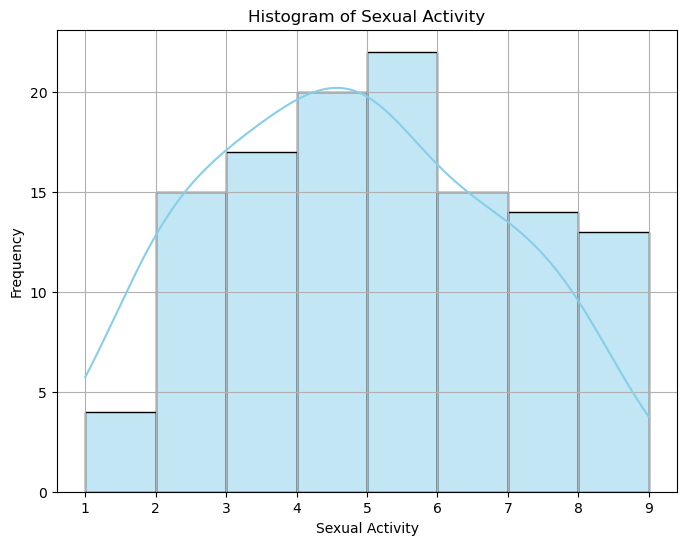

C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


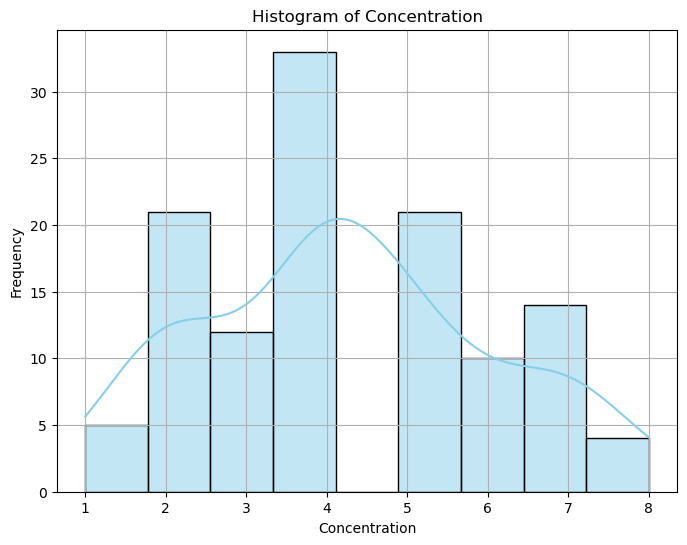

C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


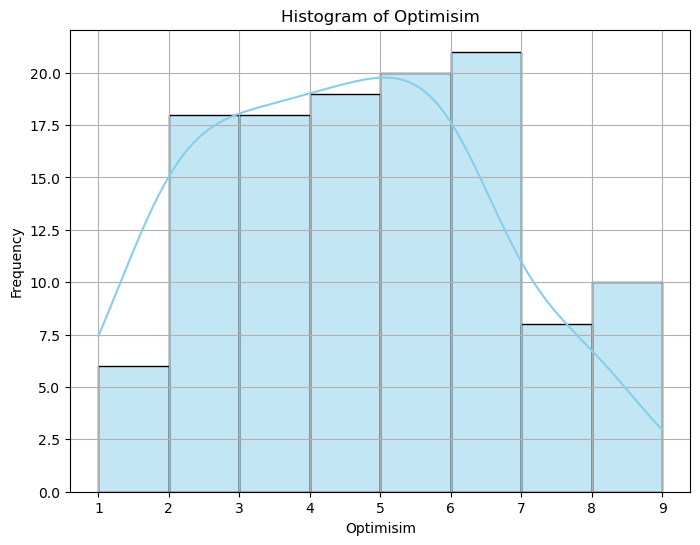

In [16]:
cols = ['Sexual Activity', 'Concentration', 'Optimisim']

# Plot histograms
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()





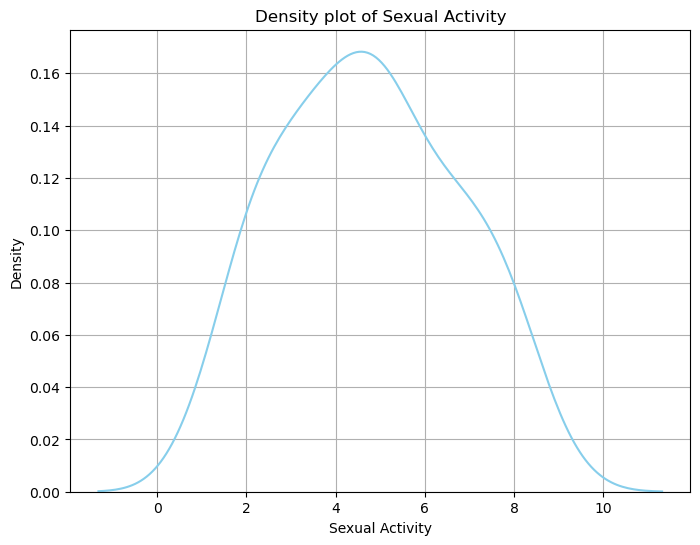

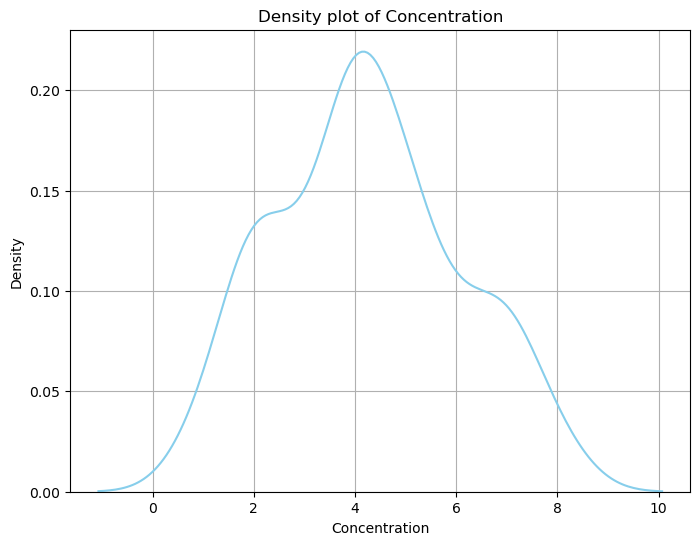

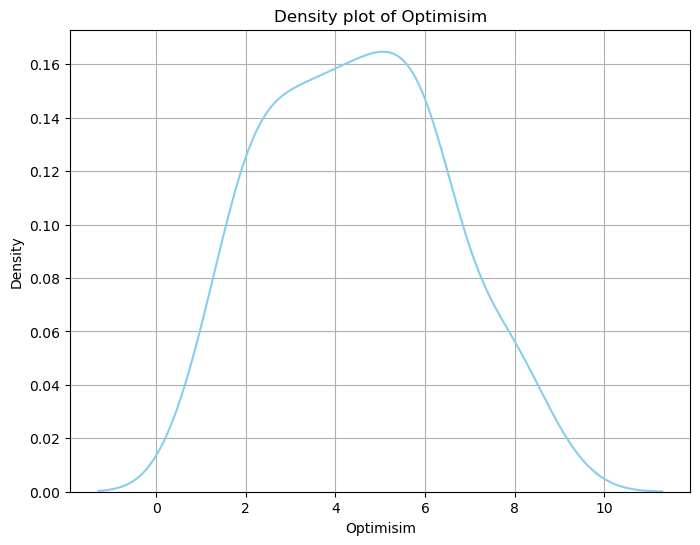

In [20]:
# Plot density plots
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], color='skyblue')
    plt.title(f'Density plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

C:\Users\noran\AppData\Local\Temp\ipykernel_360\1214276953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sexual Activity'])


<Axes: xlabel='Sexual Activity', ylabel='Density'>

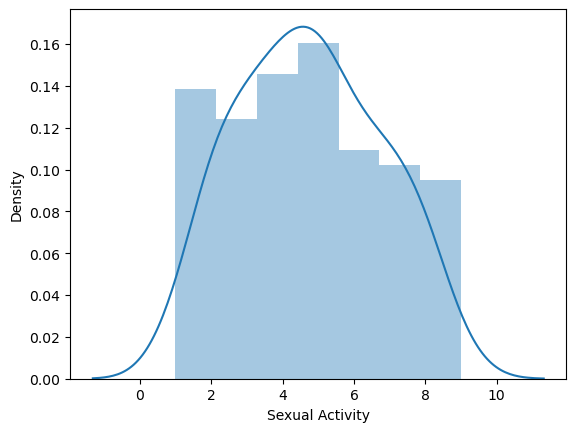

In [22]:
sns.distplot(df['Sexual Activity'])


C:\Users\noran\AppData\Local\Temp\ipykernel_360\303052713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Concentration'])


<Axes: xlabel='Concentration', ylabel='Density'>

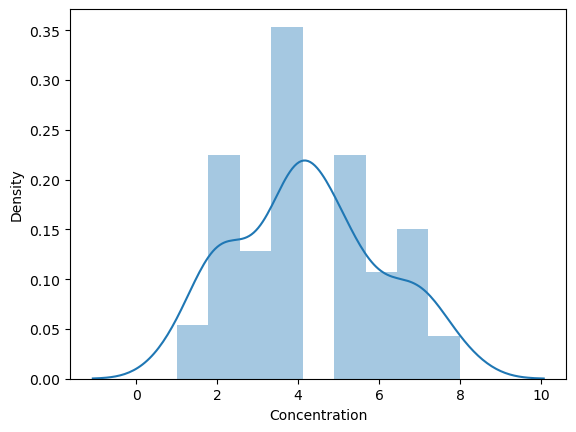

In [23]:
sns.distplot(df['Concentration'])


C:\Users\Mahmoud Shoieb\AppData\Local\Temp\ipykernel_10412\1726579856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Optimisim'])
C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Optimisim', ylabel='Density'>

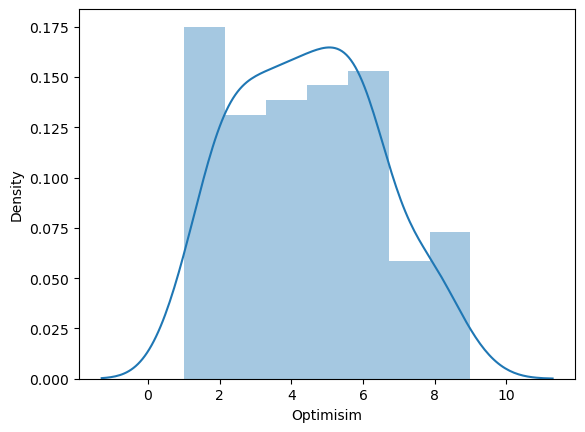

In [21]:
sns.distplot(df['Optimisim'])


<Axes: ylabel='Sexual Activity'>

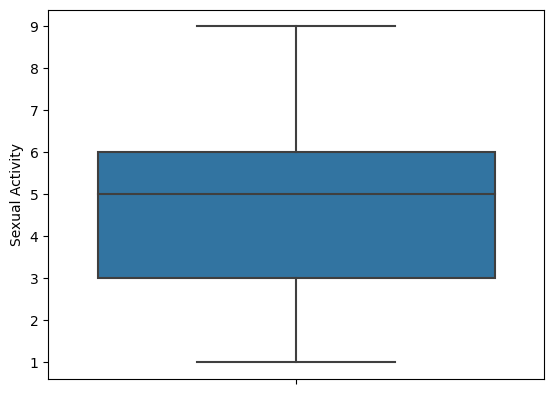

In [24]:
#sns.boxplot(df['Sexual Activity'])
sns.boxplot(data=df,y='Sexual Activity')

<Axes: ylabel='Concentration'>

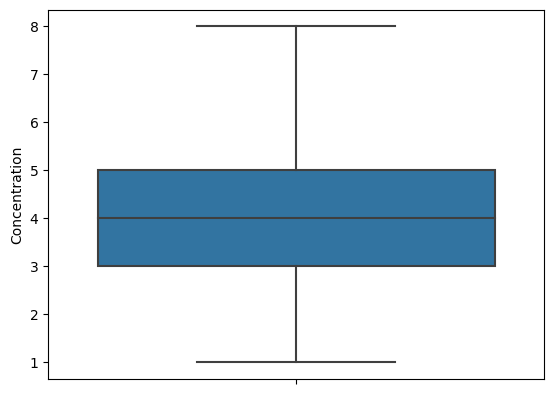

In [25]:
#sns.boxplot(df['Concentration'])
sns.boxplot(data=df,y='Concentration')

<Axes: ylabel='Optimisim'>

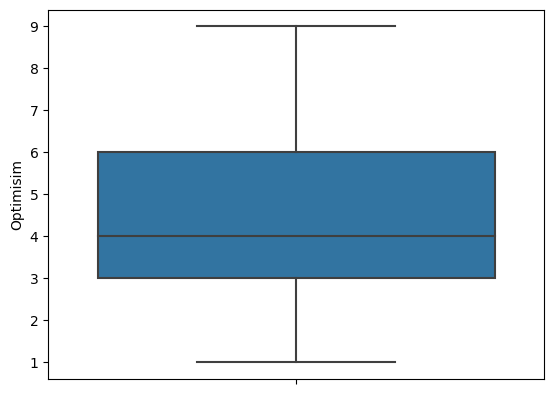

In [26]:
#sns.boxplot(df['Optimisim'])
sns.boxplot(data=df,y='Optimisim')

# Z_Score method

In [27]:
upper_limit=df['Sexual Activity'].mean()+3*df['Sexual Activity'].std()
lower_limit=df['Sexual Activity'].mean()-3*df['Sexual Activity'].std()
print('Upper limit is ',upper_limit)
print('Lower Limit is ',lower_limit)


Upper limit is  10.773044702273733
Lower Limit is  -1.2897113689404005


In [28]:
upper_limit=df['Concentration'].mean()+3*df['Concentration'].std()
lower_limit=df['Concentration'].mean()-3*df['Concentration'].std()
print('Upper limit is ',upper_limit)
print('Lower Limit is ',lower_limit)


Upper limit is  9.642571921891548
Lower Limit is  -1.1425719218915482


In [29]:
upper_limit=df['Optimisim'].mean()+3*df['Optimisim'].std()
lower_limit=df['Optimisim'].mean()-3*df['Optimisim'].std()
print('Upper limit is ',upper_limit)
print('Lower Limit is ',lower_limit)


Upper limit is  10.440559447591275
Lower Limit is  -1.507226114257941


In [30]:
# find the outlier
filtered_df =df.loc[(df['Sexual Activity']>upper_limit)|(df['Sexual Activity']<lower_limit)]
print(filtered_df.head())


Empty DataFrame
Columns: [Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose]
Index: []


In [29]:
# find the outlier
filtered_df =df.loc[(df['Concentration']>upper_limit)|(df['Concentration']<lower_limit)]
print(filtered_df.head())

Empty DataFrame
Columns: [Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose]
Index: []


In [31]:
# find the outlier
filtered_df =df.loc[(df['Optimisim']>upper_limit)|(df['Optimisim']<lower_limit)]
print(filtered_df.head())

Empty DataFrame
Columns: [Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose]
Index: []


# From the previous analysis for outliers there is no outliers detected for columns (sexual activivty,concentration and optimisim)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

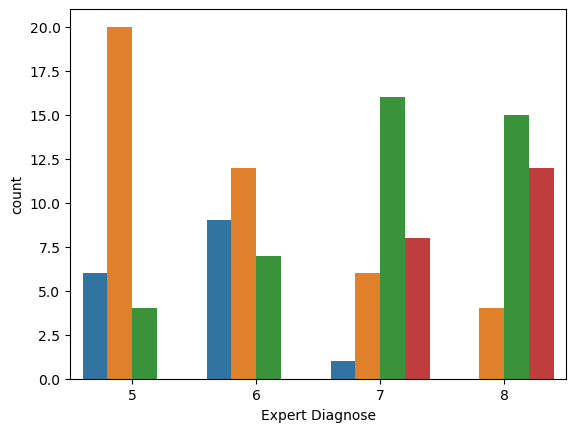

In [16]:
# Convert 'Sadness' column to categorical data
#where=sadness = {'Most-Often': 3, 'Usually': 2,'Sometimes': 1, 'Seldom': 0} 

# Plot countplot with modified DataFrame
sns.countplot(x="Expert Diagnose", hue="Sadness", data=df)
plt.title("Distribution of Sadness Across Mental Disorders")
plt.xlabel("Mental Disorders")
plt.ylabel("Count")
plt.show()

C:\Users\noran\AppData\Local\Temp\ipykernel_360\205777922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Expert Diagnose Encoded'] = label_encoder.fit_transform(selected_data['Expert Diagnose'])


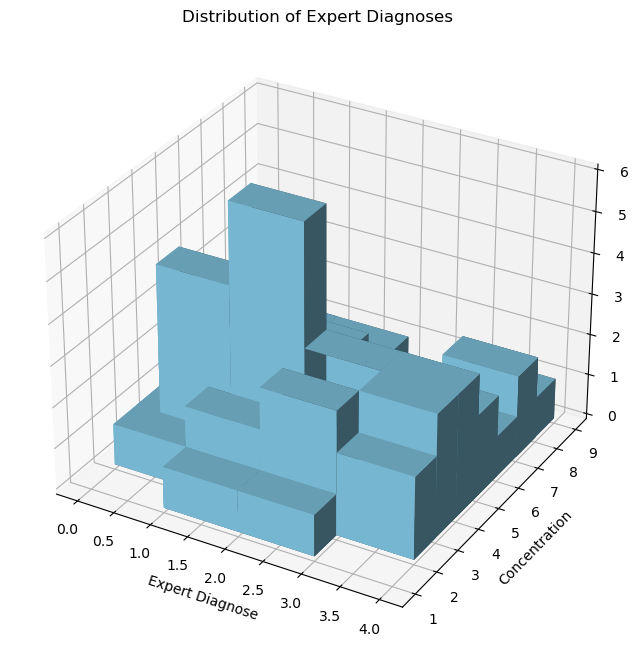

In [33]:
selected_columns = ['Expert Diagnose', 'Concentration', 'Optimisim']
selected_data = df[selected_columns]

label_encoder = LabelEncoder()

selected_data['Expert Diagnose Encoded'] = label_encoder.fit_transform(selected_data['Expert Diagnose'])

# Calculate the frequency of each combination
diagnosis_counts = selected_data.groupby(['Expert Diagnose Encoded', 'Concentration', 'Optimisim']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(diagnosis_counts['Expert Diagnose Encoded'], diagnosis_counts['Concentration'], np.zeros_like(diagnosis_counts['Count']),
         1, 1, diagnosis_counts['Count'], color='skyblue')

ax.set_title('Distribution of Expert Diagnoses')
ax.set_xlabel('Expert Diagnose')
ax.set_ylabel('Concentration')
ax.set_zlabel('Optimisim')

plt.show()

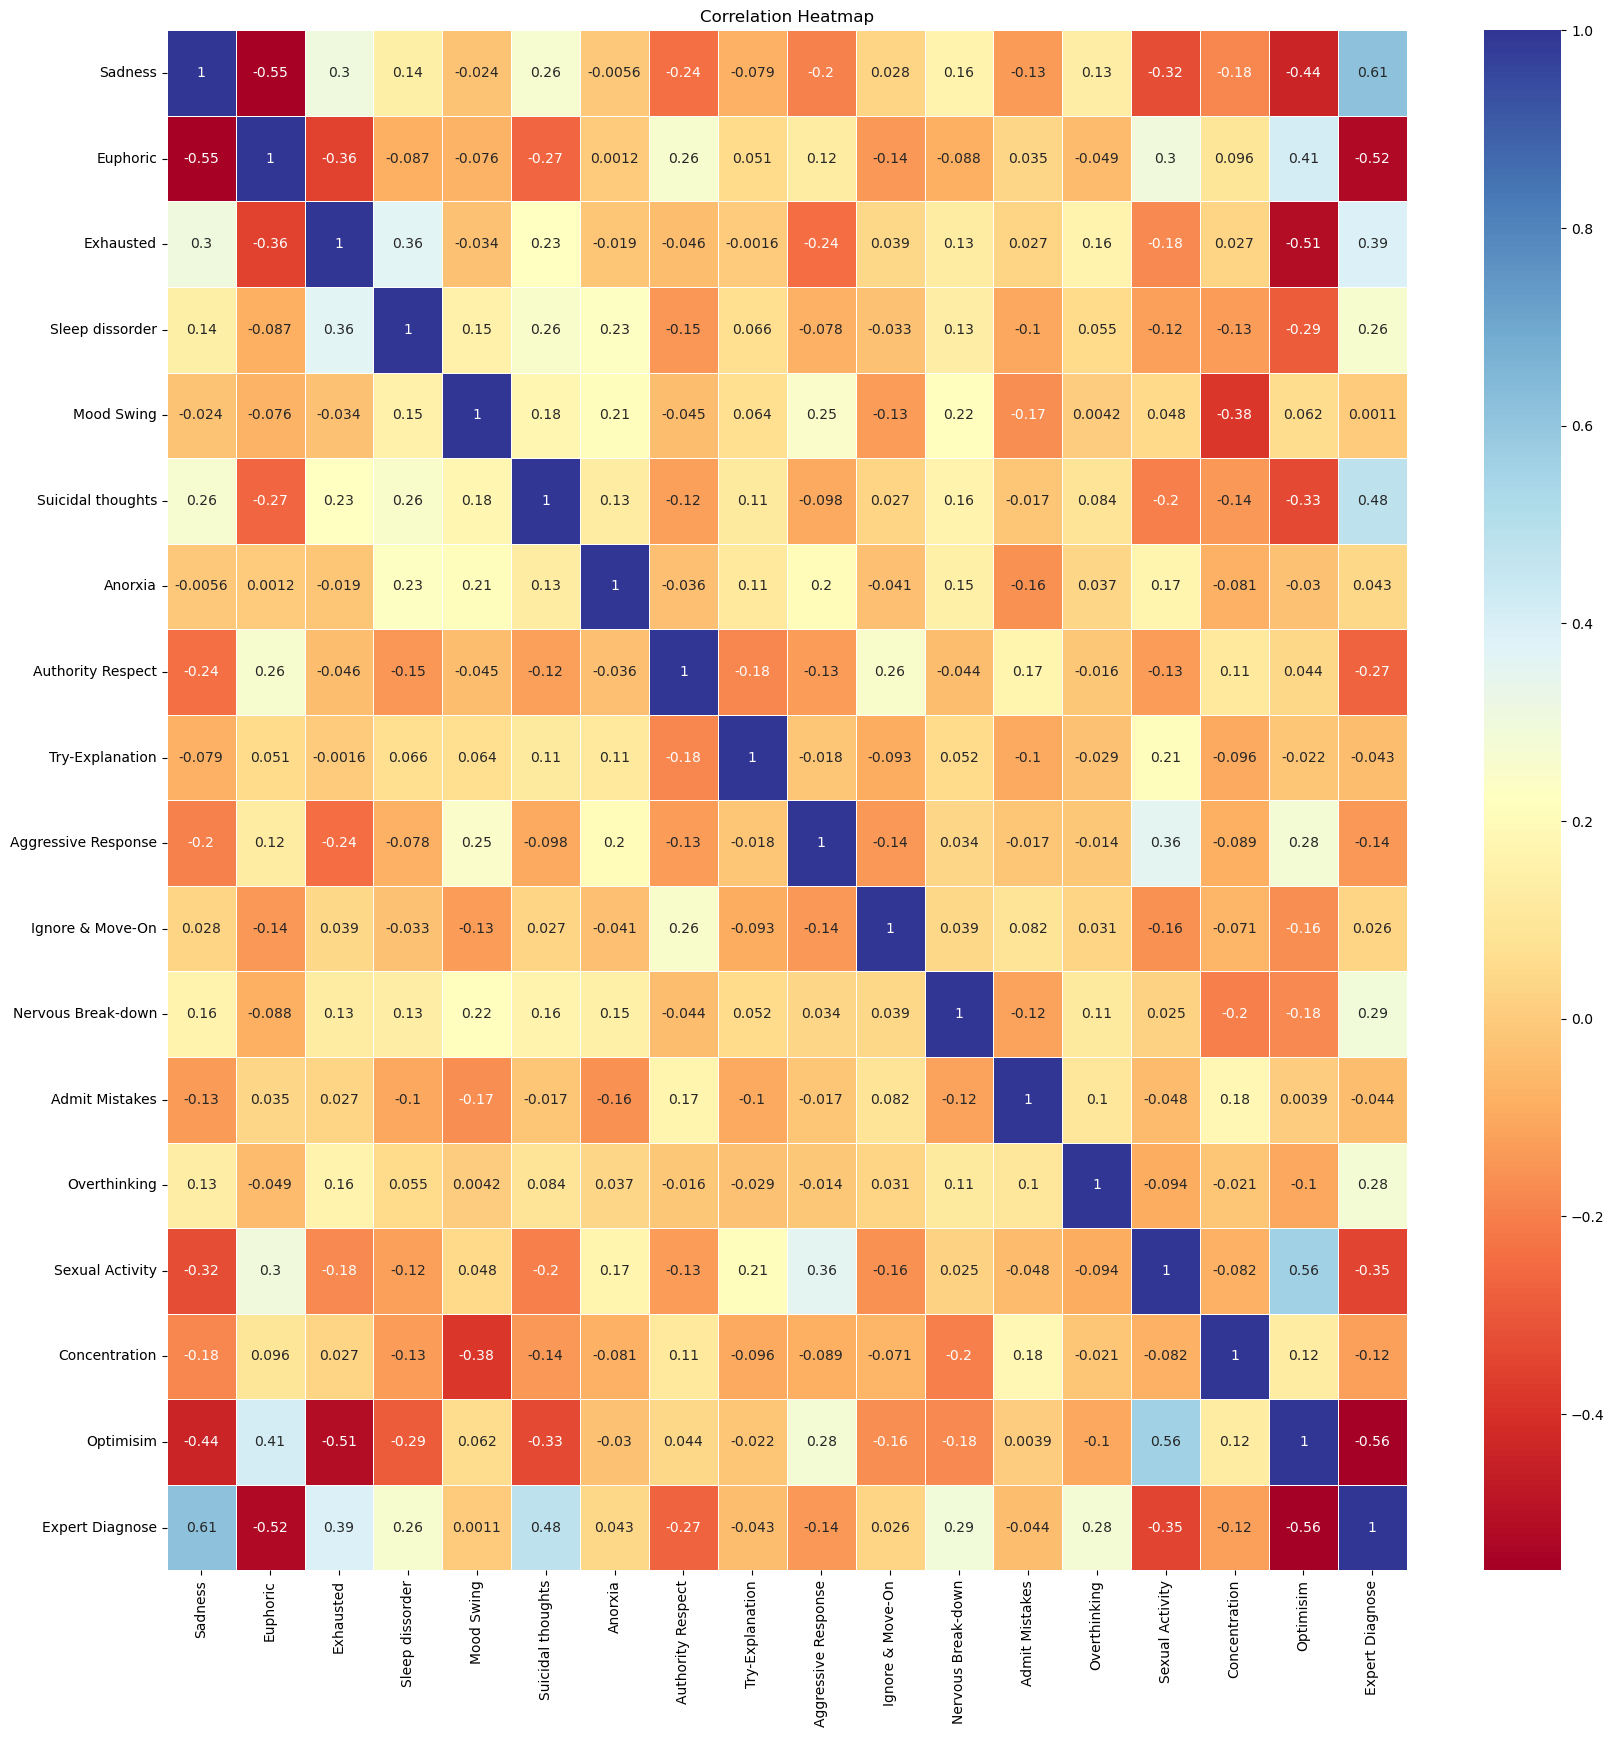

In [34]:
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='RdYlBu', linewidths=0.5, annot_kws={"fontsize": 10})
plt.title('Correlation Heatmap')

plt.show()

# End of  General preprocessing 

# Start of Questions

# Nouran's  Questions

# Question:1# 1. How does the severity of (Exhaustion) correlate with the presence of Suicidal thoughts?

Conclusion: Analyzing the correlation between symptom severity and the presence of suicidal thoughts 
can provide insights into the potential impact of symptom severity on suicidal tendencies. as by incrasing level of exhaustion ,freuency of sucidal thought increases

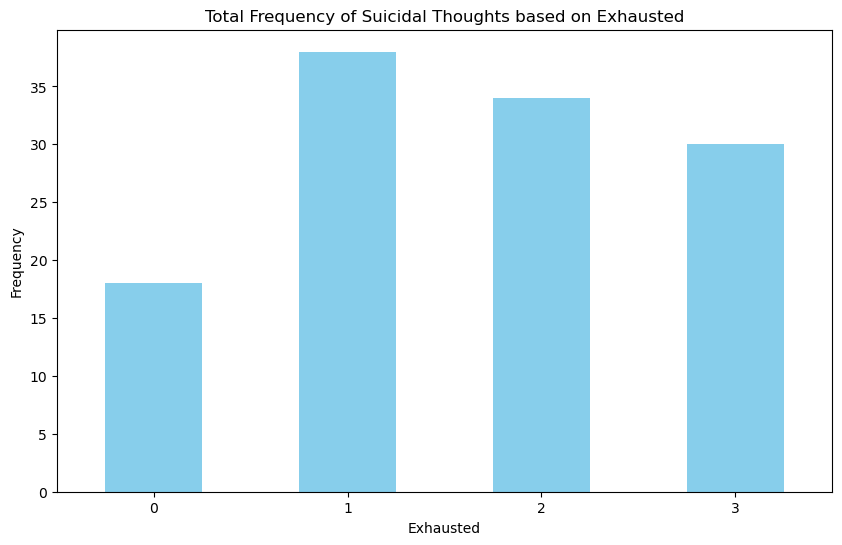

In [16]:
#feedback
#you did not write any comment on the plot to explain the extracted insight from the plot.

#The insight was concluded as follow by increasing severity of being exhausted frequency of sucidal thoughts increases

#Where 0 reprsent seldom,1 represent sometimes  2 represent usually , 3 represent most often

# Calculate frequency table
frequency_table = pd.crosstab(df['Exhausted'], df['Suicidal thoughts'])


#sum the counts of "Sucidal Thoughts" for each category of "Exhausted"
frequency_table['Total'] = frequency_table.sum(axis=1) #which affects columns

# plotting bar plot
frequency_table['Total'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Exhausted')
plt.ylabel('Frequency')
plt.title('Total Frequency of Suicidal Thoughts based on Exhausted')
# rotatae x_Axis for better readability                                               
plt.xticks(rotation=0)  

# This function to show the plot
plt.show()

# 2.Can specific combinations of symptoms such as  (Sadness) and (Mood Swing) be indicative of a particular mental disorder (Expert Diagnose)?
#Insight:
Analysis of sadness with expert diagnose
Bipolar Type-1: Individuals with this diagnosis experience different intensities of sadness. Most of the time, they feel down occasionally, but for certain people, it happens frequently. There are also reports of rare instances of sadness.

Bipolar Type-2: Individuals with this type of diagnosis exhibit varying degrees of sadness. They typically feel depressed, however some report feeling this way more frequently than others.

Depression: Patients diagnosed with depression tend to experience sadness. Usually, they report feeling sad, while some experience it sometimes and most often.

Normal: Patients with a normal diagnosis also show some level of sadness. Usually, they report feeling sad, while some experience it sometimes and most often.


Analysis of Mood swings with expert diagnose

Bipolar Type-1: Individuals with this diagnosis typically have fluctuating moods. Some of them don't suffer mood swings, but most of them do.

Bipolar Type-2: Although to a lesser degree, individuals with Bipolar Type-2 also exhibit a tendency toward mood swings. Some of them don't suffer mood swings, but most of them do.

Depression: Individuals with a diagnosis of depression typically don't show noticeable fluctuations in their mood. Most patients do not experience mood fluctuations; just a small percentage do.
Normal: Individuals with a normal diagnostic also don't exhibit noticeable fluctuations in their mood. While some patients experience mood fluctuations, others do not.





From the swarm plots, we can observe the distribution of Sadness and Mood Swing symptoms across different diagnosed mental disorders. It seems that there is some variation in the levels of these symptoms among different diagnoses. For example, individuals diagnosed with Bipolar Disorder Type I tend to exhibit higher levels of Sadness compared to those with Depression. Similarly, individuals with Bipolar Disorder Type II show a wider range of Mood Swing compared to individuals with Depression.

In [17]:
df.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [18]:
dfnew=df.copy()
dfnew

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,2,0,0,1,0,0,1,1,1,3,3,4,7
2,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,8
3,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,6
4,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,7
5,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2,5,3,8
117,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6,7,8,6
118,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1,5,3,7


C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

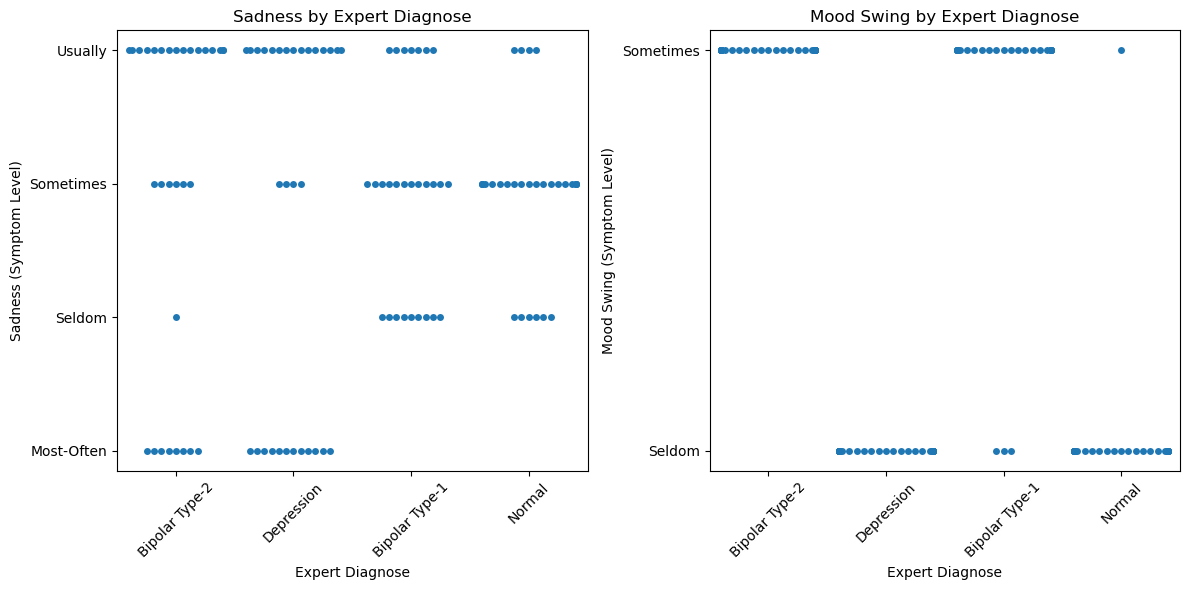

In [19]:
#For question 2, all your columns are label encoded, meaning their values only represent certain classes, 
#so it doesn't make sense to calculate any numerical operation on the labels,
#except value_counts.
#Adjust your x-axis and y-axis to correctly represent your classes and add a comment to the plot.

#modification after feedback I have used class labeled to clearly display the distribution

# Map numerical values back to categorical labels
reverse_mood_swing = {3: 'Most-Often', 2: 'Usually', 1: 'Sometimes', 0: 'Seldom'}
reverse_expert_diagnose = {5: 'Normal', 6: 'Bipolar Type-1', 7: 'Bipolar Type-2', 8: 'Depression'}
reverse_sadness = {3: 'Most-Often', 2: 'Usually', 1: 'Sometimes', 0: 'Seldom'}


dfnew['Mood Swing'] = dfnew['Mood Swing'].map(reverse_mood_swing)
dfnew['Expert Diagnose'] = dfnew['Expert Diagnose'].map(reverse_expert_diagnose)
dfnew['Sadness'] = dfnew['Sadness'].map(reverse_sadness)

# Create swarm plots to visualize the relationship between Sadness, Mood Swing, and Expert Diagnose
plt.figure(figsize=(12, 6))

# Swarm plot for Sadness by Expert Diagnose
plt.subplot(1, 2, 1)
sns.swarmplot(x='Expert Diagnose', y='Sadness', data=dfnew)
plt.title('Sadness by Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Sadness (Symptom Level)')  # Adjust y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Swarm plot for Mood Swing by Expert Diagnose
plt.subplot(1, 2, 2)
sns.swarmplot(x='Expert Diagnose', y='Mood Swing', data=dfnew)
plt.title('Mood Swing by Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Mood Swing (Symptom Level)')  # Adjust y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# 3. Is there a correlation between the presence of Anorxia and the level of Authority Respect reported by the patients?

Insight:Anorexia and Admitting Mistakes:
The percentage of patients admitting mistakes is similar for both the 'Anorexia' and 'No Anorexia' groups.
This suggests that the presence of Anorexia does not significantly impact the tendency to admit mistakes.

Anorexia and Authority Respect:
Patients with Anorexia have a lower average level of Authority Respect compared to those without Anorexia.
This finding suggests that individuals with Anorexia may struggle with respecting authority figures.

Admitting Mistakes and Authority Respect:
While not directly compared in the visualization, the willingness to admit mistakes does not necessarily correlate with the level of authority respect.
This implies that individuals can have varying levels of respect for authority figures while still demonstrating a similar tendency to admit mistakes



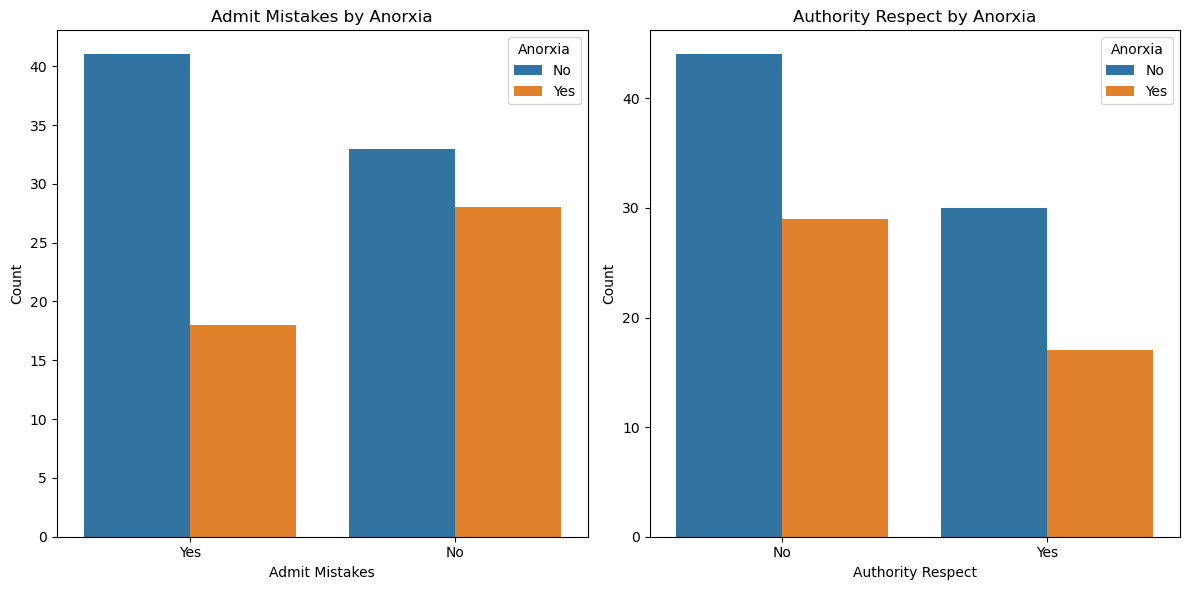

In [20]:

df3=df.copy()

reverse_Anorexia = {0: 'No', 1: 'Yes'}
reverse_Admit_Mistakes = {0: 'No', 1: 'Yes'}
reverse_Authority_Respect = {0: 'No', 1: 'Yes'}
# Convert 'Anorexia', 'Admit Mistakes', and 'Authority Respect' to categorical data type
df3['Anorxia'] = df3['Anorxia'].map(reverse_Anorexia)
df3['Admit Mistakes'] = df3['Admit Mistakes'].map(reverse_Admit_Mistakes)
df3['Authority Respect'] = df3['Authority Respect'].map(reverse_Authority_Respect)

# Plotting
plt.figure(figsize=(12, 6))

# Count plot for 'Admit Mistakes' by 'Anorexia'
plt.subplot(1, 2, 1)
sns.countplot(x='Admit Mistakes', hue='Anorxia', data=df3)
plt.title('Admit Mistakes by Anorxia')
plt.xlabel('Admit Mistakes')
plt.ylabel('Count')

# Count plot for 'Authority Respect' by 'Anorexia'
plt.subplot(1, 2, 2)
sns.countplot(x='Authority Respect', hue='Anorxia', data=df3)
plt.title('Authority Respect by Anorxia')
plt.xlabel('Authority Respect')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [22]:
df['Authority Respect'].unique

<bound method Series.unique of Patient ID
1      0
2      0
3      0
4      0
5      0
      ..
116    0
117    0
118    1
119    0
120    1
Name: Authority Respect, Length: 120, dtype: int32>

# Jana's Questions

Question:4# 4.Is there a relationship between the presence of certain symptoms (Mood Swing) and the likelihood of a patient having a certain mental disorder (Expert Diagnose)?
	Conclusion: Investigating the relationship between specific symptoms and the likelihood of a particular mental disorder can provide valuable insights into key indicators for accurate diagnosis.
es

result:105.38250387874447
value:1.0811062156701236e-22
accuracy:0.45


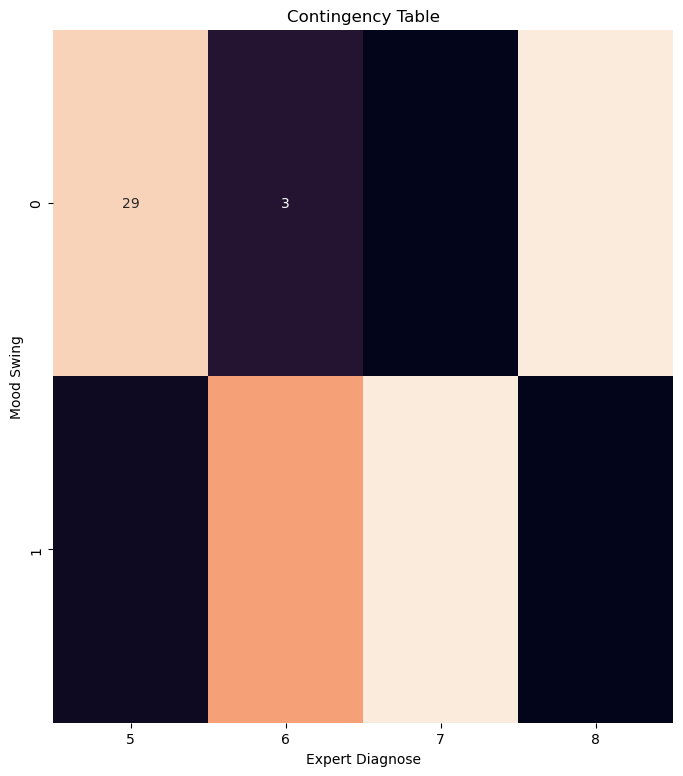

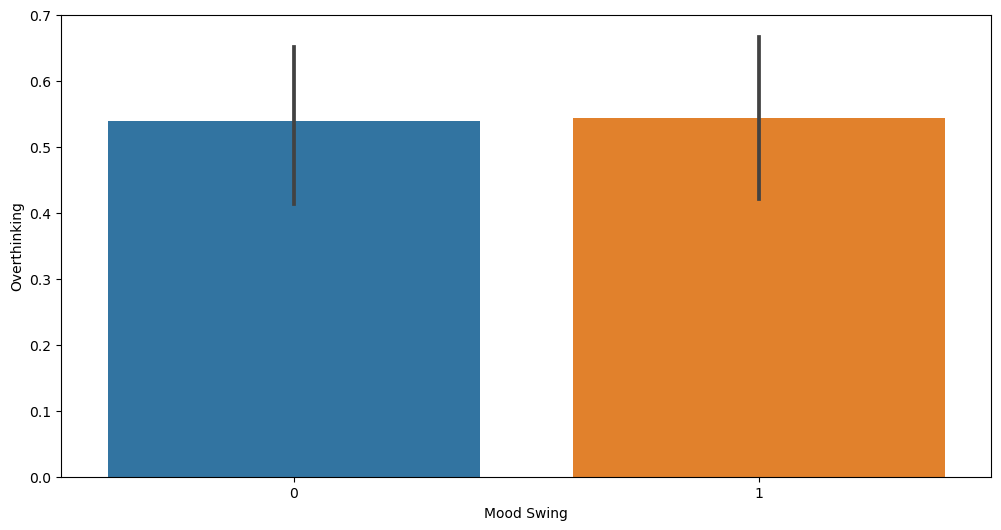

In [23]:
#catg_col=['Mood Swing','Overthinking','Expert Diagnose']

    
#df
#data = { 'Mood Swing' : [1,0,1,0],
 #       'Expert Diagnose' :[7,8,6,5],
  #     'Overthinking':[0,1,0,1]}
temp2 = df.copy() #to store them in dataframe
contingency_table = pd.crosstab(temp2['Mood Swing'],temp2['Expert Diagnose']) #using contingency_table
chi2,p,_,_=chi2_contingency(contingency_table)
#calculate the accuracy between Mood Swing and Expert Diagnose
total_predictions= contingency_table.sum().sum()
correct_predictions = contingency_table.values.trace()
accuracy = correct_predictions/total_predictions
print(f"result:{chi2}") # for printing the chi2
print(f"value:{p}") # for printing the p
print(f"accuracy:{accuracy}")# for printing the accuracy
plt.figure(figsize=(8,9)) # the size of the figure
sns.heatmap(contingency_table,annot = True,cbar=False,fmt='d') #heatmap plot between Expert Diagnose and Mood Swing
plt.title ('Contingency Table') # the head title of the heatmap
plt.xlabel ('Expert Diagnose')# the x axis's title
plt.ylabel ('Mood Swing')# the y axis's title

plt.figure(figsize=(12,6))#size of the figure
sns.barplot(x="Mood Swing", y = "Overthinking", data=temp2); # to show the relation between Mood Swing and Overthinking for more insights and information
plt.show()#plot

# 5.	 Is there a relationship between the frequency of (Anorexia) and the diagnosed mental disorder (Expert Diagnose)?

#Insight: Analysis of frequency of Anorexia with Expert Diagnose: There are many people who have Anorexia which resort to suicide and depression, the 
analysis of the relation between Anorexia and Expert Diagnose is important to know more about there mental health, and we can add more attributes like 
Exhausted and mood swing to get more information

result:6.701251441784402
value:0.08205473271416364
accuracy: 0.5


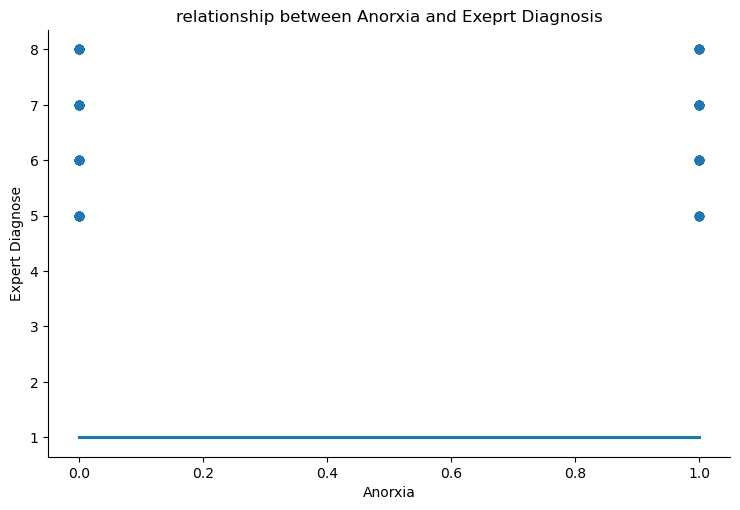

<Figure size 1200x600 with 0 Axes>

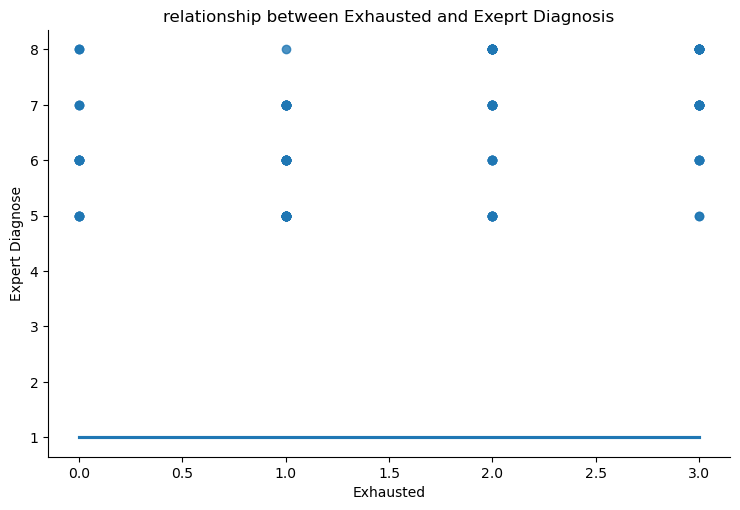

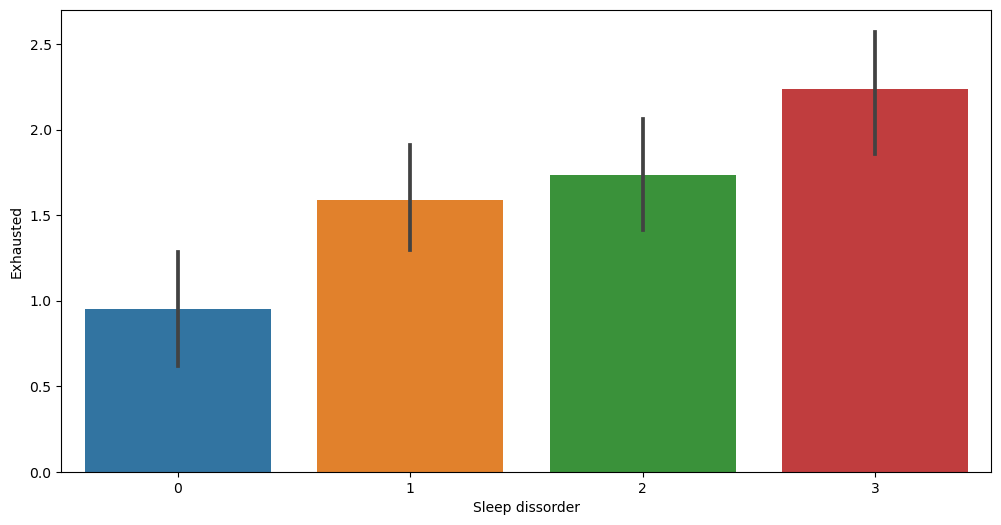

In [24]:
   
#df
#data = { 'Anorxia' : [0,1,0,1],
   #     'Expert Diagnosis' :[7,8,6,5]
  #      ,'Exhausted': [0, 1, 2, 3],
 #       'Sleep dissorder' : [0,1,2,3]
#       }
temp1 = df.copy() #to store them in dataframe
contingency_table = pd.crosstab(temp1['Anorxia'],temp1['Expert Diagnose']) #for contingency_table
chi2,p,_,_=chi2_contingency(contingency_table)
print(f"result:{chi2}")
print(f"value:{p}")
r = temp1[['Anorxia','Exhausted','Sleep dissorder']] #the attributes which included in the frist temp in the contingency_table 
t = temp1['Expert Diagnose']#the attributes which included in the frist temp in the contingency_table 
X_train, X_test, y_train, y_test = train_test_split(r, t, test_size=0.2, random_state=42)#This line is splitting the dataset into training and testing sets.
#calculate the accuracy
model = LogisticRegression() #This line initializes a logistic regression model.
#Logistic regression is a type of regression analysis used for predicting the probability of a binary outcome.
model.fit(X_train, y_train) # This line trains the logistic regression model using the training data.
y_axis = model.predict(X_test) #This line uses the trained logistic regression model to make predictions on the test data (X_test).
a = accuracy_score(y_test, y_axis) # It computes the accuracy score by comparing the true labels(y-test) to the predicted labels(y-axis).
print(f"accuracy: {a}") # This line to print the cacluated accuracy.
sns.lmplot (x='Anorxia', y ='Expert Diagnose',data = temp1,logistic =True,aspect=1.5)#This line creates a scatter plot with a logistic regression line fit to the data.
plt.title('relationship between Anorxia and Exeprt Diagnosis') #This line sets the title of the plot to 'relationship between Anorxia and Expert Diagnosis'.
plt.figure(figsize=(12,6))#This line creates a new figure with a specified size.
sns.lmplot(x='Exhausted', y ='Expert Diagnose',data = temp1,logistic =True,aspect=1.5) #This line creates another scatter plot with a logistic regression line, similar to the first one, 
#but this time plotting 'Exhausted' against 'Expert Diagnosis'.
plt.title('relationship between Exhausted and Exeprt Diagnosis') #This line sets the title of the second plot to 'relationship between Exhausted and Expert Diagnosis'.
plt.figure(figsize=(12,6))#This line creates a new figure with a specified size.
sns.barplot(x="Sleep dissorder", y = "Exhausted", data=temp1); #This line creates a bar plot showing the relationship between 'Sleep disorder' (x-axis) and 'Exhausted' (y-axis)using the data from the DataFrame df.
plt.show()#This line displays all the created plots

# 6.	Is there a correlation between the frequency of Euphoric episodes and the likelihood of being diagnosed with Bipolar Type-1?
•	Conclusion: Analyzing the correlation between the frequency of Euphoric episodes and the diagnosis of Bipolar Type-1 can help determine if there is a significant relationship between these two factor
s #Insight: Analysis of frequency of Euphoric episodes with Bipolar Type-1: There are many people who have Bipolar Type-1, may be look normally and deon't have any thing ang seems so happy ang normal, the analysis of the relation between Euphoric and Bipolar Type-1 is important to know more about there mental health early to let them be able to heal from this without any side effect, and we can add more attributes like Suicidal thoughts to get more information about there thoughts to try to let them getrid of it without harming themselves or harm anyone
.


In [25]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,2,0,0,1,0,0,1,1,1,3,3,4,7
2,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,8
3,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,6
4,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,7
5,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2,5,3,8
117,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6,7,8,6
118,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1,5,3,7


result : 0.27011903811514
Accuracy: 0.125


C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


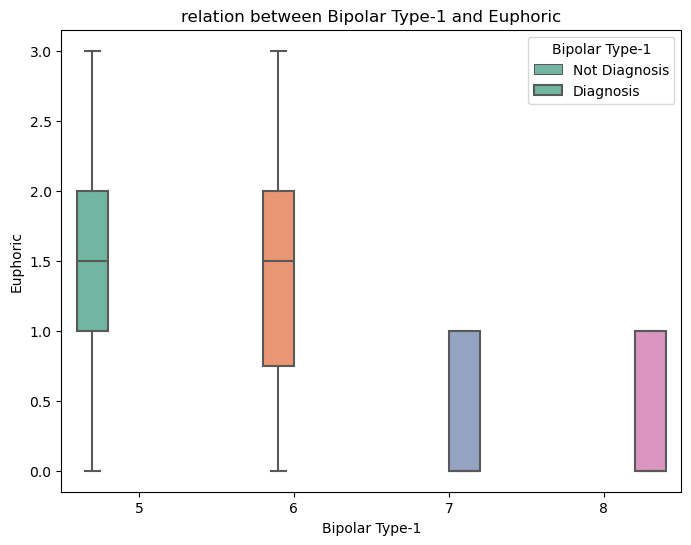

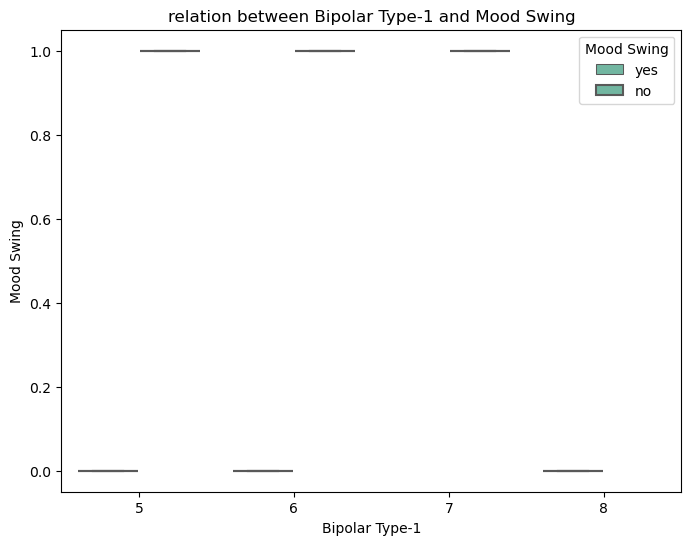

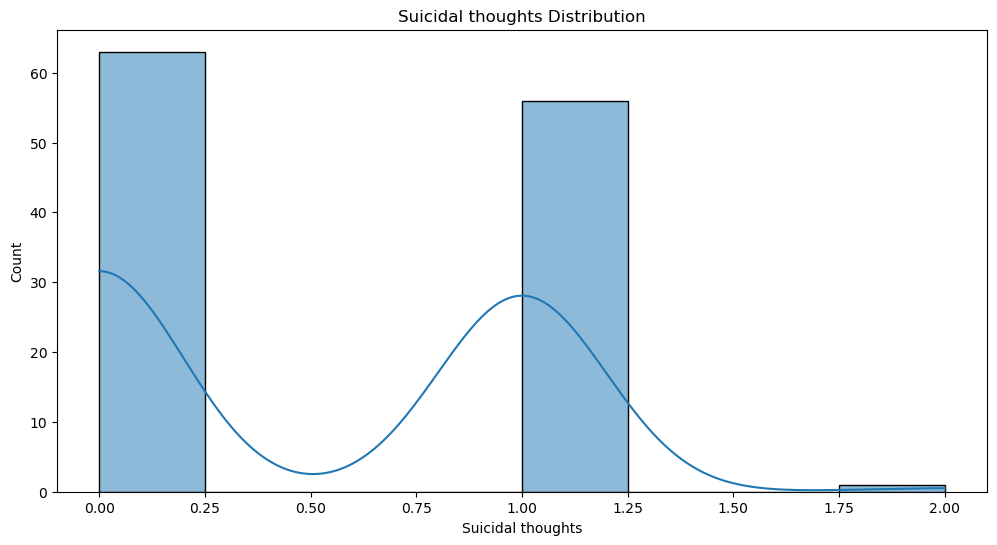

In [26]:

#df
#data = {'Bipolar Type-1' : [1,2,3,4],
  #      'Euphoric':[0,1,2,3],
 #      'Suicidal thoughts':[0,1,0,1],
#       'Mood Swing' : [1,0,1,0]}
temp = df.copy() # To store these attributes in data
corr_coefficient,_= spearmanr(temp['Expert Diagnose']==6,temp['Euphoric'])#This line calculates the Spearman correlation coefficient between the columns 'Bipolar Type-1' and 'Euphoric' in the DataFrame
print(f"result : {corr_coefficient}")#print the result
accuracy = accuracy_score(temp['Expert Diagnose']==6, [['Expert Diagnose']==6 if euphoric > 1 else 7 for euphoric in temp['Euphoric']]) #This line calculates the accuracy of a model's predictions.
#It compares the true labels ('Bipolar Type-1') with the predicted labels.
#Predicted labels are determined based on the values of the 'Euphoric' column: if the value is greater than 1, it's predicted as 'Bipolar Type-1'. 
#otherwise, it's predicted as 'Bipolar Type-2'.
print(f"Accuracy: {accuracy}") # This line will print the accuracy
plt.figure(figsize=(8,6))#the size of the graph
sns.boxplot(x='Expert Diagnose',y='Euphoric',data=temp,hue='Expert Diagnose',palette='Set2') #hue='Bipolar Type-1' colors the boxes based on the values of 'Bipolar Type-1' and specifies the color palette to be used
#adds a legend to the plot, specifying the title and labels for the legend items.
plt.xlabel('Bipolar Type-1')
plt.ylabel('Euphoric')
plt.title ('relation between Bipolar Type-1 and Euphoric')#graph between Bipolar Type-1 and Euphoric
plt.legend(title='Bipolar Type-1',loc='upper right',labels=['Not Diagnosis','Diagnosis'])#box plot with colours
plt.figure(figsize=(8,6))
sns.boxplot(x='Expert Diagnose',y='Mood Swing',data=temp,hue='Mood Swing',palette='Set2') #This code block is similar to the previous one but visualizes the relationship between 'Bipolar Type-1' and 'Mood Swing'.
plt.xlabel('Bipolar Type-1')
plt.ylabel('Mood Swing')
plt.title ('relation between Bipolar Type-1 and Mood Swing')#graph between Bipolar Type-1 and Mood Swing
plt.legend(title='Mood Swing',loc='upper right',labels=['yes','no'])
plt.figure(figsize=(12,6))
plt.subplot(1,1,1) #specifies a single subplot within the figure.
sns.histplot(df['Suicidal thoughts'],kde=True) #kde=True adds a kernel density estimate line to the plot
plt.title('Suicidal thoughts Distribution')
plt.show()#The resulting histogram plot is displayed using plt.show(). 

## Mahmoud's Questions

# Question7: Investigating whether the severity of concentration difficulties, along with sleep disorders and mood swings, influences the likelihood of being diagnosed with Bipolar Type-2 ? Conclusion: By analyzing the interplay between concentration difficulties, sleep disorders, mood swings, and the likelihood of a Bipolar Type-2 diagnosis, we can better understand how these factors collectively contribute to the diagnostic process and inform treatment strategies.

In [27]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient ID,,,,,,,,,,,,,,,,,,
1,2,0,1,1,1,2,0,0,1,0,0,1,1,1,3,3,4,7
2,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,8
3,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,6
4,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,7
5,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2,5,3,8
117,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6,7,8,6
118,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1,5,3,7


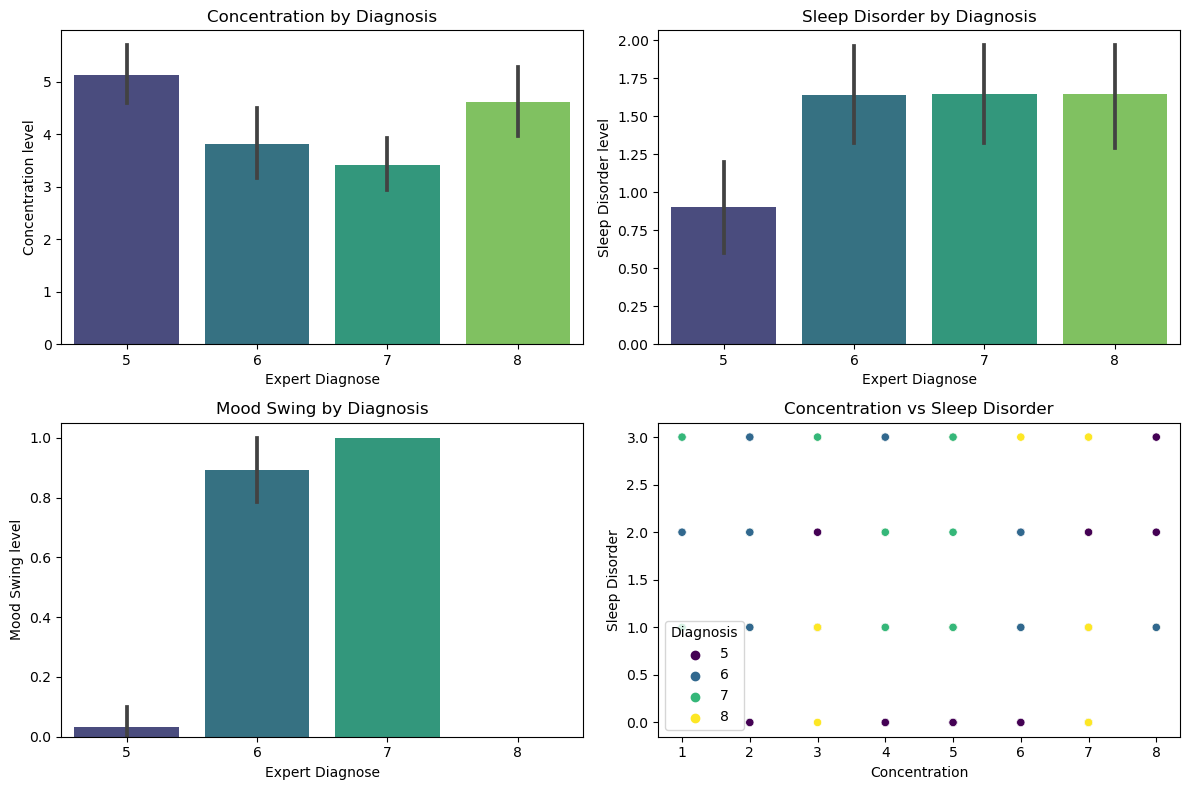

In [28]:
#new visualization after feedback without calculating mean
#i used encoded numeric values for so that it can be represented in numeric values in the scatter plot 
#0 level means the level is low when the number increases the level increases 
#for expert diagnose 5 is normal,6 is bipolar type 1 ,7 is bipolar type2 ,8 is depression
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='Expert Diagnose', y='Concentration', palette='viridis' ,data=df)
plt.title('Concentration by Diagnosis')
plt.xlabel('Expert Diagnose')
plt.ylabel('Concentration level')

plt.subplot(2, 2, 2)
sns.barplot(x='Expert Diagnose', y='Sleep dissorder', palette='viridis', data=df)
plt.title('Sleep Disorder by Diagnosis')
plt.xlabel('Expert Diagnose')
plt.ylabel('Sleep Disorder level')

plt.subplot(2, 2, 3)
sns.barplot(x='Expert Diagnose', y='Mood Swing', palette='viridis',data=df)
plt.title('Mood Swing by Diagnosis')
plt.xlabel('Expert Diagnose')
plt.ylabel('Mood Swing level')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Concentration', y='Sleep dissorder', hue='Expert Diagnose', palette='viridis')
plt.title('Concentration vs Sleep Disorder')
plt.xlabel('Concentration')
plt.ylabel('Sleep Disorder')
plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


# Analysis: Concentration: Bipolar Type-2 patients tend to have higher concentration difficulties compared to other diagnoses, followed by Bipolar Type-1 and Depression. Normal patients have the lowest concentration difficulties.
Sleep Disorder: Bipolar Type-2 patients also exhibit high sleep disorders, similar to concentration difficulties.
Mood Swing: Bipolar Type-2 patients show higher mood swings compared to other diagnoses, with Bipolar Type-1 following closely. Depression patients have the lowest mood swings.
There seems to be a positive correlation between concentration difficulties and sleep disorders, especially for patients diagnosed with Bipolar Type-2 and Bipolar Type-1. These patients tend to cluster in the upper-left region of the plot, indicating high levels of both concentration difficulties and sleep disorders.
Patients diagnosed with Bipolar Type-2 exhibit higher concentration difficulties, sleep disorders, and mood swings compared to other diagnoses. The scatter plot also suggests a positive correlation between concentration difficulties and sleep disorders, particularly prominent among Bipolar Type-2 patients.

# Question8: 8.	Is there a correlation between being euphoric and the having aggressive responses by the patients and whether aggressive responses vary between normar people and mental health disorders people?
•	Conclusion: to investigate whether there is a relationship between feelings of euphoria and the tendency for patients to exhibit aggressive responses. it aims to understand potential behavioral patterns and associations between euphoric states and aggressive tendencies in individuals with mental health conditions and with the comparison to normal people.


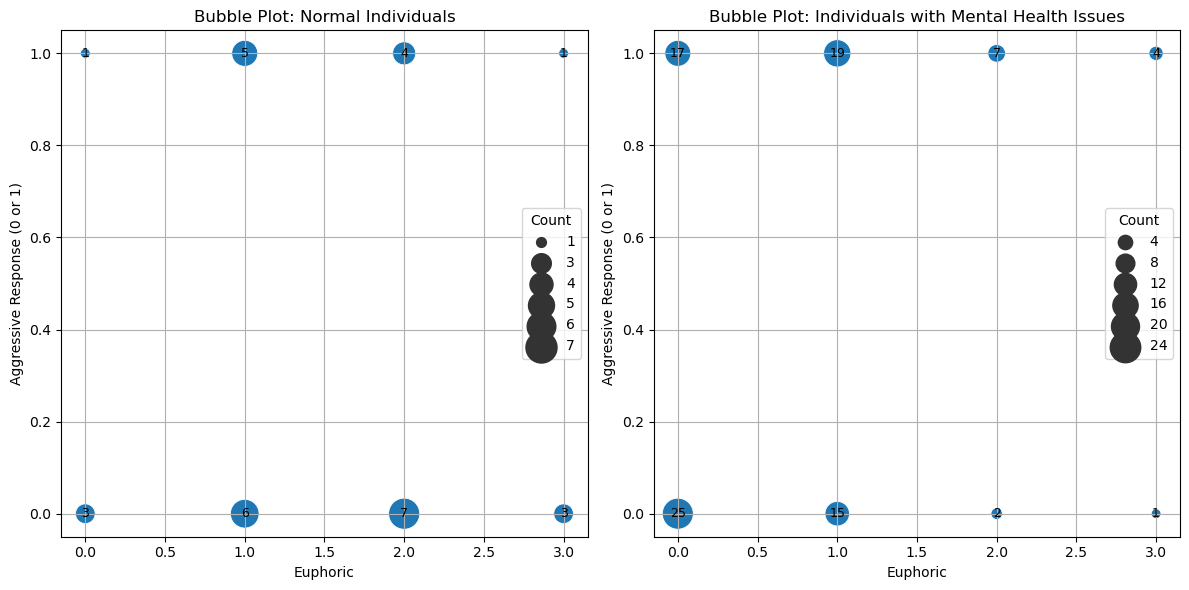

In [29]:
#new visualization after feedback with counting the values rather than calculating average 
# Divide the data into normal people and people with mental health issues
normal_group = df[df['Expert Diagnose'] == 5]
mental_health_group = df[df['Expert Diagnose'] != 5]

# Calculate counts for each group
normal_counts = normal_group.groupby(['Euphoric', 'Aggressive Response']).size().reset_index(name='Count')
mental_health_counts = mental_health_group.groupby(['Euphoric', 'Aggressive Response']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

# Plot Bubble Plot for Normal Individuals
plt.subplot(1, 2, 1)
sns.scatterplot(data=normal_counts, x='Euphoric', y='Aggressive Response', size='Count', sizes=(50, 500))
plt.title('Bubble Plot: Normal Individuals')
plt.xlabel('Euphoric')
plt.ylabel('Aggressive Response (0 or 1)')
plt.grid(True)

for index, row in normal_counts.iterrows():
    plt.text(row['Euphoric'], row['Aggressive Response'], row['Count'], ha='center', va='center', fontsize=9)

# Plot Bubble Plot for Individuals with Mental Health Issues
plt.subplot(1, 2, 2)
sns.scatterplot(data=mental_health_counts, x='Euphoric', y='Aggressive Response', size='Count', sizes=(50, 500))
plt.title('Bubble Plot: Individuals with Mental Health Issues')
plt.xlabel('Euphoric')
plt.ylabel('Aggressive Response (0 or 1)')
plt.grid(True)

for index, row in mental_health_counts.iterrows():
    plt.text(row['Euphoric'], row['Aggressive Response'], row['Count'], ha='center', va='center', fontsize=9)

plt.tight_layout()
plt.show()


Analysis: in the first bubble plot we can see that number of mental health people who are 0 euphoric which means they seldom feel euphoric are bigger than normal people and through all the bubbles we can see that the size of the bubble keep decreasing while the euphoric is better for the mental health people,, on the other side with Mental Health people we can see also that aggressive responses with diffrent stages of euphoric are almost always bigger than normal people which means mental health people are struggling with aggressive responses overall but to see how specifically Euphoric can have an impact on the aggressive responses for the mental health patients we can use the second diagram which tells us that except for the first case when they seldomly feel euphoric they have less aggressive responses, but in all other cases they have more aggressive responses but when the feeling of euphoric increases the count of agrressive responses decreases 

# Question9: How does overthinking impact both concentration levels and mental health?
•	Conclusion: analyzing the relation to explore the impact of overthinking on concentration levels and its association with mental health and expert diagnose.


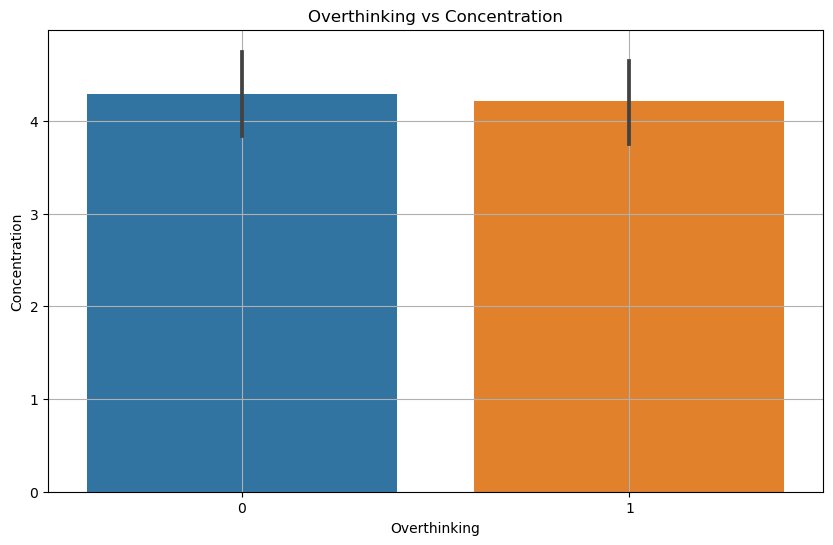

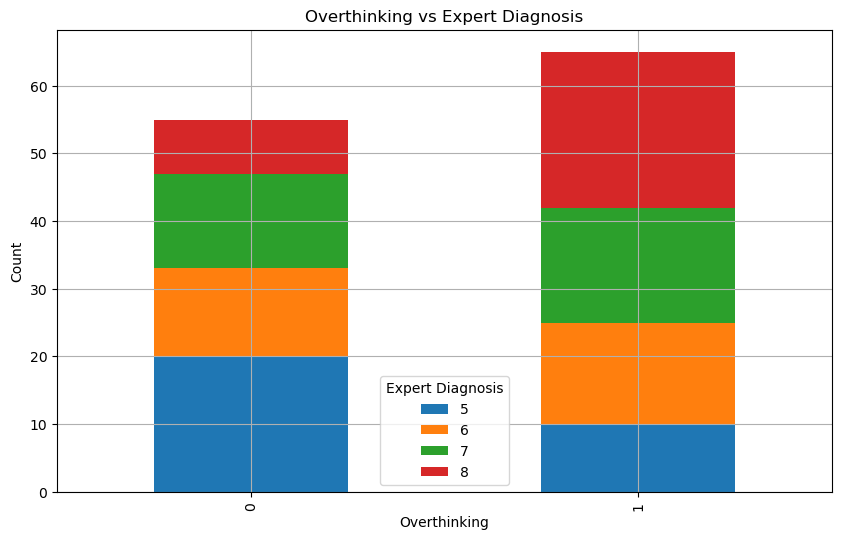

In [30]:
#for expert diagnose 5 is normal,6 is bipolar type 1 ,7 is bipolar type2 ,8 is depression
plt.figure(figsize=(10, 6))
sns.barplot(x='Overthinking', y='Concentration', data=df)
plt.title('Overthinking vs Concentration')
plt.xlabel('Overthinking')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

expert_diagnosis_count = df.groupby(['Overthinking', 'Expert Diagnose']).size().unstack()
expert_diagnosis_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Overthinking vs Expert Diagnosis')
plt.xlabel('Overthinking')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Expert Diagnosis')
plt.show()

Analysis: when overthinking is yes (1) it tend to be associated with lower concentration levels so when there's overthinking it results in low concentration levels.
for overthinking and mental health we can see that for normal people they tends to overthink less but there is a shift in expert diagnoses towards conditions like depression as overthinking levels increase and continues in other medical conditions too.
This indicates that overthinking may not only affect concentration negatively but could also be linked to mental health issues such as depression.

# Shahd's Questions

# 10.Are sleep disturbances associated with Concentration, nervous breakdowns and anorexia?

exploring the potential relationship between sleep disturbances and three significant mental health factors:
suicidal thoughts, anorexia and nervous breakdowns. By examining whether there is an association between these variables,
researchers or healthcare professionals can gain insights into the interplay between sleep quality,anorexia, and mental health issues.
Understanding this correlation may help in identifying risk factors for suicidal ideation and the occurrence of nervous breakdowns.

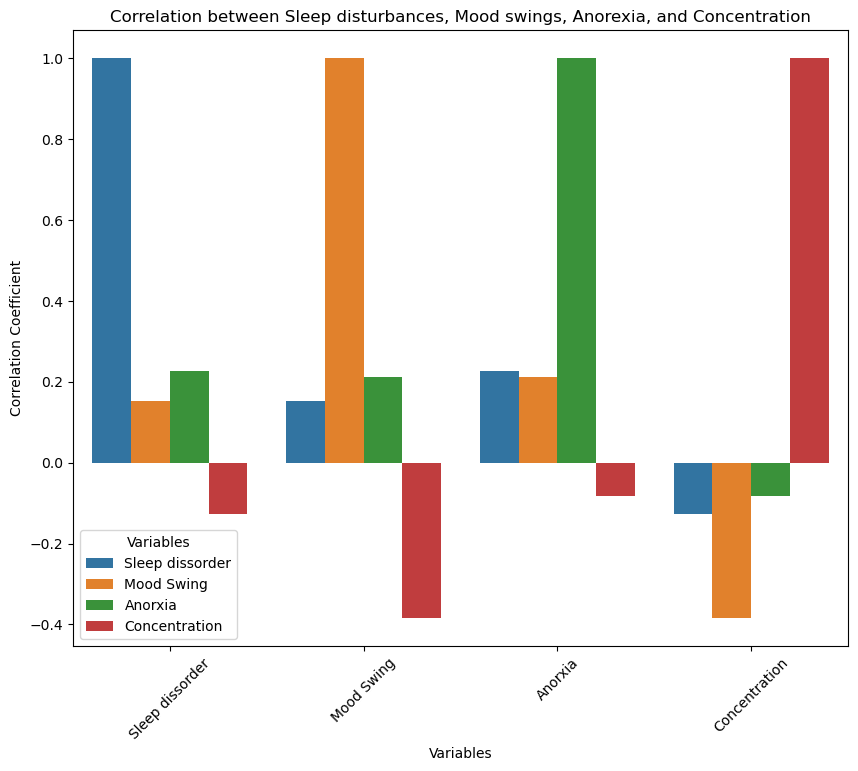

In [31]:
# Compute the correlation matrix
join_matrix = df[['Sleep dissorder', 'Mood Swing', 'Anorxia', 'Concentration']].corr()

# Reshape the correlation matrix for plotting
correlation_data = join_matrix.unstack().reset_index(name='correlation')

# Plot grouped bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='level_0', y='correlation', hue='level_1', data=correlation_data)
plt.title('Correlation between Sleep disturbances, Mood swings, Anorexia, and Concentration')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.legend(title='Variables')
plt.show()



Sleep Disturbances:
Positively correlated with Anorexia.
Negatively correlated with Mood Swings and Concentration.
so as sleep disturbances increase anxiety increases.
and as sleep disturbances increase cincentration level decreases.
but lack of sleep doesnt increase mood swings .

Mood Swings:
Positively correlated with Anorexia.
Negatively correlated with Sleep Disturbances and Concentratio
.Concentration:
Positively correlated with itself.
Negatively correlated with Sleep Disturbances, Mood Swings, and AnorexianAnorexia:
Positively correlated with Mood Swings.
Negatively correlated with Sleep Disturbances and Concentratio
n..ation
.
Overall sleep distuces may have some association with , swings, and concey strong. Other factors beyond sleep disturbances likely play a role in the presmood swingssymptoms, and further investigation may be needed to understand the complex relationship between these variables.

# 11.Do professionals wrongly classify patients who tend to ignore their problems and move on as normal?

To assess whether there may be instances where professionals misclassify patients who express a desire to ignore their problems 
and move on as "normal." By exploring this possibility, the aim is to understand whether certain coping mechanisms or attitudes
toward problems might lead professionals to overlook underlying mental health issues in individuals.

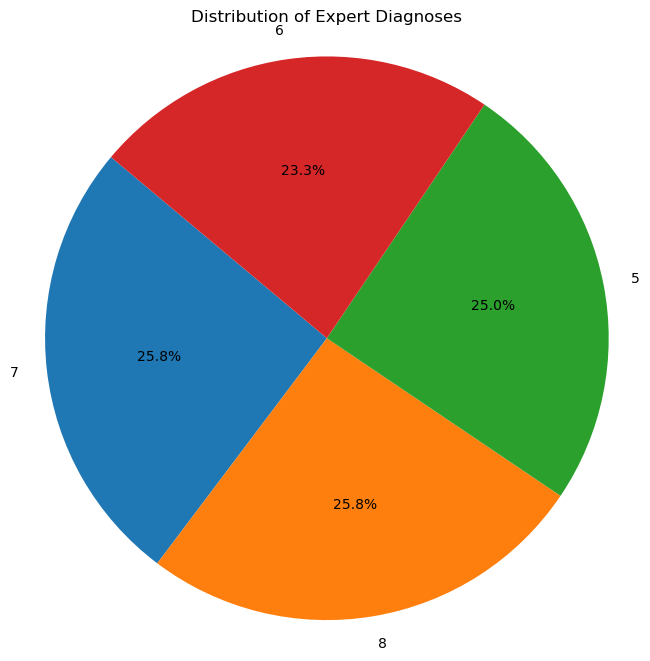

In [32]:
diagnosis_counts = df['Expert Diagnose'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Expert Diagnoses')
plt.axis('equal')  
plt.show()

<Figure size 1000x600 with 0 Axes>

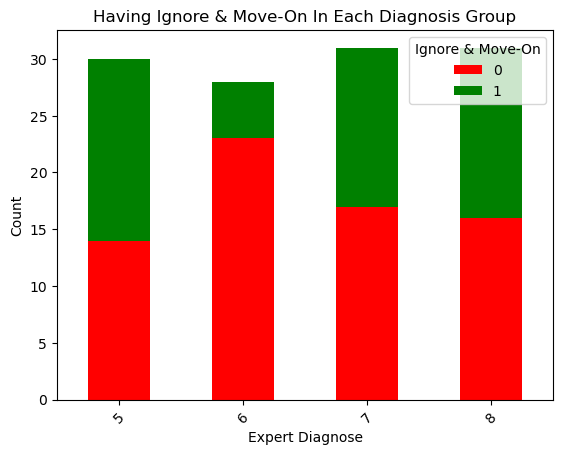

In [33]:
# Grouping  'Expert Diagnose' and 'Ignore & Move-On', then counting the occurrences
counts = df.groupby("Expert Diagnose")["Ignore & Move-On"].value_counts().unstack(fill_value=0)

# Creating a figure for the bar plot with a specified size
plt.figure(figsize=(10, 6))

# Creating a stacked bar plot based on the counts, with red and green colors for 'Ignore & Move-On' values
counts.plot(kind="bar", stacked=True, color=["red", "green"])

plt.title("Having Ignore & Move-On In Each Diagnosis Group")
plt.xlabel("Expert Diagnose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Ignore & Move-On", loc="upper right")
plt.show()

where: 
5 --> normal
6 --> Bipolar 1
7 --> Bipolar 2
8 --> Depression 

The highest count of patients with the “Ignore & Move-On” trait is observed in the ‘Normal’ diagnosis group (Expert Diagnose = 5).
The ‘Bipolar Type-1’ diagnosis group (Expert Diagnose = 6) has the lowest count of patients with the “Ignore & Move-On” trait.

Since nearly 50% of normal patiens tends to ignore their problems and move on there can be a big percentage that they were wrongly classified.

Overall, there isa small percentage suggesting that professionals may classify patients who tend to ignore their problems and move on as normal.  since normal patients tend to ignore and move on more there can be a small percentage that they were wrongly classified.

# 12.Do patients who experience “Overthinking” also tend to exhibit “Nervous Breakdowns” and “suicidal thoughts”?	

To investigate potential correlations between these three symptoms. By exploring whether there is a relationship between 
overthinking, nervous breakdowns, and suicidal thoughts,the question seeks to understand if individuals who exhibit symptoms
of overthinking arealso more likely to experience suicidal ideation  and nervous breakdowns. 
This could prevent suicide cases by finding out if there is an interconnectedness of these mental health issues 
and aid in the development of targeted interventions or support strategies for individuals dealing with these challenges.

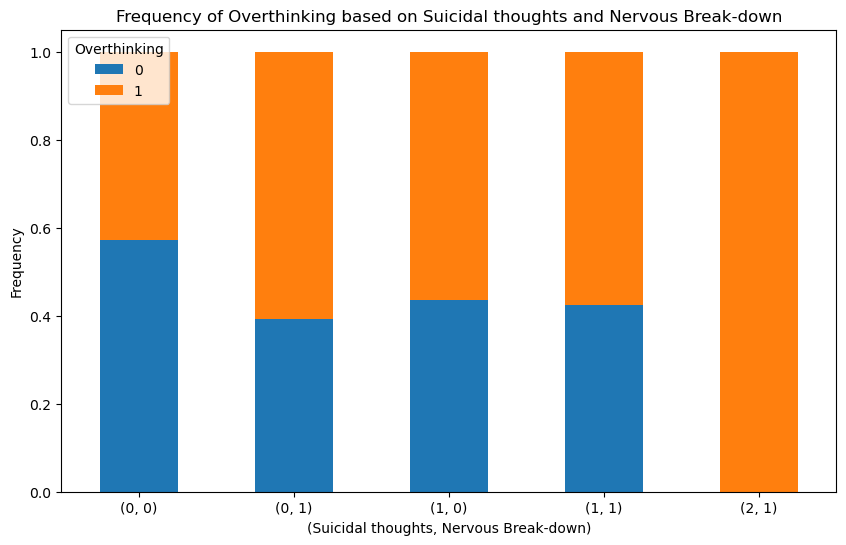

In [34]:
# Grouping the data by 'Suicidal thoughts', 'Nervous Break-down', and 'Overthinking',
# then calculating the  value counts to prepare for plotting
grouped_data = df.groupby(['Suicidal thoughts', 'Nervous Break-down'])['Overthinking'].value_counts(normalize=True).unstack()

# Plotting a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frequency of Overthinking based on Suicidal thoughts and Nervous Break-down')
plt.xlabel('(Suicidal thoughts, Nervous Break-down)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Overthinking', loc='upper left')
plt.show()


The relationship between Overthinking, Suicidal Thoughts and Nervous Breakdowns.
Overthinking and Nervous Breakdowns:
There is a positive correlation between overthinking and nervous breakdowns.
As overthinking increases, the chance of experiencing nervous breakdowns also increases.

Suicidal Thoughts:
Suicidal thoughts are associated with both overthinking and nervous breakdowns.
Individuals with high levels of overthinking and nervous breakdowns are more likely to have some level of suicidal thoughts.

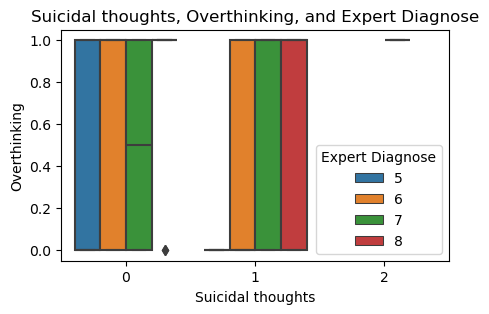

In [35]:
plt.figure(figsize=(5, 3))

# Creating a box plot with 'Suicidal thoughts' on x-axis, 'Overthinking' on y-axis,
# and hue as 'Expert Diagnose' to differentiate by the expert diagnosis
sns.boxplot(x='Suicidal thoughts', y='Overthinking', data=df, hue='Expert Diagnose')

plt.title('Suicidal thoughts, Overthinking, and Expert Diagnose')
plt.show()



using the boxplot we are connecting between the relation between overthinking and suicidal thoughts to the expert diagnose.
The plot shows how overthinking varies across different levels of suicidal thoughts, as categorized by these expert diagnoses.g.

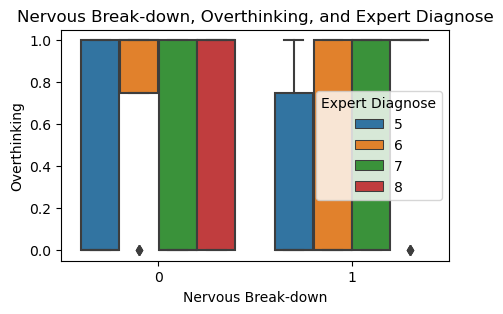

In [36]:
plt.figure(figsize=(5, 3))
# Creating a box plot with 'Nervous Break-down' on the x-axis, 'Overthinking' on the y-axis,
# and hue as 'Expert Diagnose' to differentiateby the expert diagnosis
sns.boxplot(x='Nervous Break-down', y='Overthinking', data=df, hue='Expert Diagnose')

plt.title('Nervous Break-down, Overthinking, and Expert Diagnose')
plt.show()


using the boxplot we are connecting between the relation between overthinking and Nervous Break-down to the expert diagnose.
The plot shows how overthinking varies across different levels of Nervous Break-down , as categorized by these expert diagnoses.

# Project 2

In [37]:
df=pd.read_csv('Dataset-Mental-Disorders.csv')

# Scraping website 1

In [38]:
url = 'https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2022.1052702/full'

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

paragraphs = soup.find_all('p')

statement = None
for p in paragraphs:
    if "male-female ratio in depression is" in p.text:
        statement = p.text
        break

if statement:
    numbers = re.findall(r'\d+', statement)  # Extract all numbers from the statement
    
    numbers = numbers[:2]

    if len(numbers) >= 2:
        numbers = list(map(int, numbers))

        total = sum(numbers)
        percentage_male = (numbers[0] / total) * 100
        percentage_female = (numbers[1] / total) * 100

        data = {'Diagnose': ['Depression'],
                'Male Percentage': [percentage_male],
                'Female Percentage': [percentage_female]}
        df2 = pd.DataFrame(data)
        df2 = df2.set_index('Diagnose')

        print(df2)
    else:
        print("Error: Not enough numbers found in the statement.")
else:
    print("Error: Statement not found in the article.")

            Male Percentage  Female Percentage
Diagnose                                      
Depression        33.333333          66.666667


In [39]:
df2

,Male Percentage,Female Percentage
Diagnose,,
Depression,33.333333,66.666667


In [40]:
merged_df = pd.merge(df, df2, how='left', left_on='Expert Diagnose', right_index=True)
merged_df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,...,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose,Male Percentage,Female Percentage
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2,NaN,NaN
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression,33.333333,66.666667
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1,NaN,NaN
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2,NaN,NaN
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression,33.333333,66.666667
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1,NaN,NaN
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2,NaN,NaN
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression,33.333333,66.666667


# Scraping website 2

In [41]:
url = 'https://journalbipolardisorders.springeropen.com/articles/10.1186/s40345-020-00207-z'

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

paragraphs = soup.find_all('p')

statement = None
for p in paragraphs:
    if "both BDI and BDII patients" in p.get_text():
        statement = p.get_text()
        break

print(statement)


Nine out of ten studies analysed samples of both BDI and BDII patients, while one study only analysed a sample of BDI patients. All the evaluated studies described the general distribution of their samples in terms of gender, reporting a higher prevalence of female patients, with female patient proportions ranging from 57∙4% (RENDiBi Study) to 65∙0% (WAVE-BD) (Fig. 1a). Of these, three studies (Mayo Clinic Biobank, RENDiBi Study, WAVE-BD) described the distribution of their samples in terms of BDI and BDII (Mayo Clinic Biobank 69∙4% of BDI, RENDiBi Study 62∙2% of BDI, WAVE-BD 68∙7% of BDI), while one of them (BipoläR) further categorised patients in BDI (47∙1%), BDII (38∙1%), and Bipolar Disorder – Not Otherwise Specified (BD NOS) (14∙8%). In these four studies, a higher prevalence of BDI diagnosis among women can be found (Fig. 1c). Moreover, the Mayo Clinic Biobank study reported the gender distribution of the sub-samples BD-I (F = 58∙6%) and BD-II (F = 66∙1%), while the BipoläR stud

In [42]:
bd1_female=(69.4+62.2+68.7+47.1+58.6+57.3)/6
bd2_female=(38.1+66.1+64.9)/3
bd1_male=100-bd1_female
bd2_male=100-bd2_female
data = {
    'Diagnose': ['Bipolar Type-1', 'Bipolar Type-2'],
    'Male Percentage': [bd1_male, bd2_male],
    'Female Percentage': [bd1_female, bd2_female]
}

df3 = pd.DataFrame(data)
df3 = df3.set_index('Diagnose')
df3

,Male Percentage,Female Percentage
Diagnose,,
Bipolar Type-1,39.450000,60.550000
Bipolar Type-2,43.633333,56.366667


In [43]:
merged2_df = pd.merge(merged_df, df3, how='left', left_on='Expert Diagnose', right_index=True)
merged2_df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,...,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose,Male Percentage_x,Female Percentage_x,Male Percentage_y,Female Percentage_y
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2,NaN,NaN,43.633333,56.366667
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,NO,NO,4 From 10,2 From 10,5 From 10,Depression,33.333333,66.666667,NaN,NaN
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1,NaN,NaN,39.450000,60.550000
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2,NaN,NaN,43.633333,56.366667
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,YES,YES,5 From 10,5 From 10,6 From 10,Normal,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,NO,YES,2 From 10,5 From 10,3 From 10,Depression,33.333333,66.666667,NaN,NaN
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1,NaN,NaN,39.450000,60.550000
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2,NaN,NaN,43.633333,56.366667
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,YES,YES,7 From 10,7 From 10,7 From 10,Depression,33.333333,66.666667,NaN,NaN


In [44]:
merged2_df['Male Percentage_x'].fillna(merged2_df['Male Percentage_y'], inplace=True)
merged2_df['Female Percentage_x'].fillna(merged2_df['Female Percentage_y'], inplace=True)
merged2_df.drop(['Male Percentage_y', 'Female Percentage_y'], axis=1, inplace=True)
merged2_df = merged2_df.rename(columns={'Male Percentage_x': 'Male Percentage', 'Female Percentage_x': 'Female Percentage'})
merged2_df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,...,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose,Male Percentage,Female Percentage
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2,43.633333,56.366667
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression,33.333333,66.666667
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1,39.450000,60.550000
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2,43.633333,56.366667
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression,33.333333,66.666667
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1,39.450000,60.550000
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2,43.633333,56.366667
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression,33.333333,66.666667


# What is the overall gender distribution among patients diagnosed with depression? 

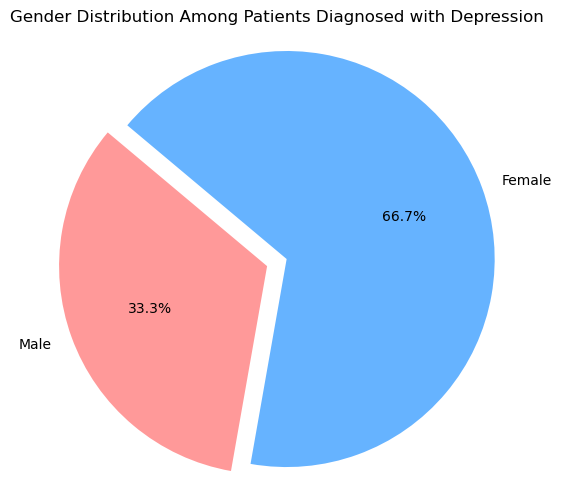

In [48]:
male_count = merged2_df[merged_df['Expert Diagnose'] == 'Depression']['Male Percentage'].sum()
female_count = merged2_df[merged_df['Expert Diagnose'] == 'Depression']['Female Percentage'].sum()

labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution Among Patients Diagnosed with Depression')
plt.axis('equal')  
plt.show()

# what is the overall distribution for patients with mental illness ?

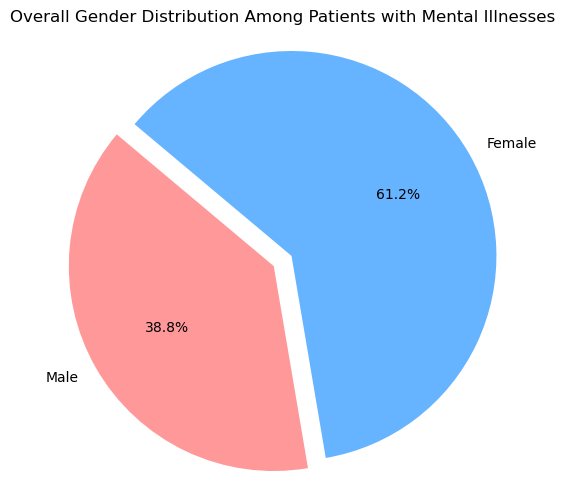

In [49]:
mental_illness_df = merged2_df[merged2_df['Expert Diagnose'].isin(['Depression', 'Bipolar Type-1', 'Bipolar Type-2'])]

overall_male_count = mental_illness_df['Male Percentage'].sum()
overall_female_count = mental_illness_df['Female Percentage'].sum()

labels = ['Male', 'Female']
sizes = [overall_male_count, overall_female_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Gender Distribution Among Patients with Mental Illnesses')
plt.axis('equal')
plt.show()

# Scraping website 3

In [50]:

url = "https://ncbi.nlm.nih.gov/books/NBK44246/table/A2893/"
response = requests.get(url)


if response.status_code == 200:
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    
    tablular_data = soup.find("table", class_="no_bottom_margin")
    
    if tablular_data:
        
        rows_data = tablular_data.find_all("tr")
        
        
        headers_data = [header.text.strip() for header in rows_data[0].find_all("th")]
        print(headers_data)
        
        # Extract and print the table rows
        for row in rows_data[1:]:
            row_data = [data.text.strip() for data in row.find_all("td")]
            print(row_data)
    else:
        print("Table not found on the webpage.")
else:
    print("Failed to fetch webpage:", response.status_code)



['', 'ECA Prevalence (%)', 'NCS Prevalence (%)', 'Best Estimate\n**(%)']
['Any Anxiety Disorder ECA', '13.1', '1 8.7', '16.4']
['Simple Phobia', '8.3', '8.6', '8.3']
['Social Phobia', '2.0', '7.4', '2.0']
['Agoraphobia', '4.9', '3.7', '4.9']
['GAD', '(1.5)*', '3.4', '3.4']
['Panic Disorder', '1.6', '2.2', '1.6']
['OCD', '2.4', '(0.9)*', '2.4']
['PTSD', '(1.9)*', '3.6', '3.6']
['Any Mood Disorder', '7.1', '11.1', '7.1']
['MD Episode', '6.5', '10.1', '6.5']
['Unipolar MD', '5.3', '8.9', '5.3']
['Dysthymia', '1.6', '2.5', '1.6']
['Bipolar I', '1.1', '1.3', '1.1']
['Bipolar II', '0.6', '0.2', '0.6']
['Schizophrenia', '1.3', '-', '1.3']
['Nonaffective Psychosis', '-', '0.2', '0.2']
['Somatization', '0.2', '-', '0.2']
['ASP', '2.1', '-', '2.1']
['Anorexia Nervosa', '0.1', '-', '0.1']
['Severe Cognitive Impairment', '1.2', '-', '1.2']
['Any Disorder', '19.5', '23.4', '21.0']


In [55]:
cleaned_tabular_data = [
    ['', 'ECA Prevalence (%)', 'NCS Prevalence (%)', 'Best Estimate (%)'],
    ['Any Anxiety Disorder ECA', 13.1, '1 8.7', 16.4],
    ['Simple Phobia', 8.3, 8.6, 8.3],
    ['Social Phobia', 2.0, 7.4, 2.0],
    ['Agoraphobia', 4.9, 3.7, 4.9],
    ['GAD', '(1.5)', 3.4, 3.4],
    ['Panic Disorder', 1.6, 2.2, 1.6],
    ['OCD', 2.4, '(0.9)', 2.4],
    ['PTSD', '(1.9)', 3.6, 3.6],
    ['Any Mood Disorder', 7.1, 11.1, 7.1],
    ['MD Episode', 6.5, 10.1, 6.5],
    ['Unipolar MD', 5.3, 8.9, 5.3],
    ['Dysthymia', 1.6, 2.5, 1.6],
    ['Bipolar I', 1.1, 1.3, 1.1],
    ['Bipolar II', 0.6, 0.2, 0.6],
    ['Schizophrenia', 1.3, np.nan, 1.3],
    ['Nonaffective Psychosis', np.nan, 0.2, 0.2],
    ['Somatization', 0.2, np.nan, 0.2],
    ['ASP', 2.1, np.nan, 2.1],
    ['Anorexia Nervosa', 0.1, np.nan, 0.1],
    ['Severe Cognitive Impairment', 1.2, np.nan, 1.2],
    ['Any Disorder', 19.5, 23.4, 21.0]
]


cleaned_tabular_data = [[item if not isinstance(item, str) else item.replace('(', '').replace(')', '').strip() for item in row] for row in cleaned_tabular_data]


for row in cleaned_tabular_data:
    print(row)

['', 'ECA Prevalence %', 'NCS Prevalence %', 'Best Estimate %']
['Any Anxiety Disorder ECA', 13.1, '1 8.7', 16.4]
['Simple Phobia', 8.3, 8.6, 8.3]
['Social Phobia', 2.0, 7.4, 2.0]
['Agoraphobia', 4.9, 3.7, 4.9]
['GAD', '1.5', 3.4, 3.4]
['Panic Disorder', 1.6, 2.2, 1.6]
['OCD', 2.4, '0.9', 2.4]
['PTSD', '1.9', 3.6, 3.6]
['Any Mood Disorder', 7.1, 11.1, 7.1]
['MD Episode', 6.5, 10.1, 6.5]
['Unipolar MD', 5.3, 8.9, 5.3]
['Dysthymia', 1.6, 2.5, 1.6]
['Bipolar I', 1.1, 1.3, 1.1]
['Bipolar II', 0.6, 0.2, 0.6]
['Schizophrenia', 1.3, nan, 1.3]
['Nonaffective Psychosis', nan, 0.2, 0.2]
['Somatization', 0.2, nan, 0.2]
['ASP', 2.1, nan, 2.1]
['Anorexia Nervosa', 0.1, nan, 0.1]
['Severe Cognitive Impairment', 1.2, nan, 1.2]
['Any Disorder', 19.5, 23.4, 21.0]


In [56]:
cleaned_tabular_data = [
    ['', 'ECA Prevalence %', 'NCS Prevalence %', 'Best Estimate %'],
    ['Any Anxiety Disorder ECA', 13.1, '1 8.7', 16.4],
    ['Simple Phobia', 8.3, 8.6, 8.3],
    ['Social Phobia', 2.0, 7.4, 2.0],
    ['Agoraphobia', 4.9, 3.7, 4.9],
    ['GAD', 1.5, 3.4, 3.4],
    ['Panic Disorder', 1.6, 2.2, 1.6],
    ['OCD', 2.4, 0.9, 2.4],
    ['PTSD', 1.9, 3.6, 3.6],
    ['Any Mood Disorder', 7.1, 11.1, 7.1],
    ['MD Episode', 6.5, 10.1, 6.5],
    ['Unipolar MD', 5.3, 8.9, 5.3],
    ['Dysthymia', 1.6, 2.5, 1.6],
    ['Bipolar I', 1.1, 1.3, 1.1],
    ['Bipolar II', 0.6, 0.2, 0.6],
    ['Schizophrenia', 1.3, np.nan, 1.3],
    ['Nonaffective Psychosis', np.nan, 0.2, 0.2],
    ['Somatization', 0.2, np.nan, 0.2],
    ['ASP', 2.1, np.nan, 2.1],
    ['Anorexia Nervosa', 0.1, np.nan, 0.1],
    ['Severe Cognitive Impairment', 1.2, np.nan, 1.2],
    ['Any Disorder', 19.5, 23.4, 21.0]
]


df2 = pd.DataFrame(cleaned_tabular_data[1:], columns=cleaned_tabular_data[0])


(df2)

,,ECA Prevalence %,NCS Prevalence %,Best Estimate %
0,Any Anxiety Disorder ECA,13.1,1 8.7,16.4
1,Simple Phobia,8.3,8.6,8.3
2,Social Phobia,2.0,7.4,2.0
3,Agoraphobia,4.9,3.7,4.9
4,GAD,1.5,3.4,3.4
5,Panic Disorder,1.6,2.2,1.6
6,OCD,2.4,0.9,2.4
7,PTSD,1.9,3.6,3.6
8,Any Mood Disorder,7.1,11.1,7.1
9,MD Episode,6.5,10.1,6.5


In [57]:
cleaned_tabular_data = [
    ['Matched Diagnoses', 'ECA Prevalence %', 'NCS Prevalence %', 'Best Estimate %'],
    ['Any Anxiety Disorder ECA', 13.1, '1 8.7', 16.4],
    ['Simple Phobia', 8.3, 8.6, 8.3],
    ['Social Phobia', 2.0, 7.4, 2.0],
    ['Agoraphobia', 4.9, 3.7, 4.9],
    ['GAD', 1.5, 3.4, 3.4],
    ['Panic Disorder', 1.6, 2.2, 1.6],
    ['OCD', 2.4, 0.9, 2.4],
    ['PTSD', 1.9, 3.6, 3.6],
    ['Any Mood Disorder', 7.1, 11.1, 7.1],
    ['MD Episode', 6.5, 10.1, 6.5],
    ['Unipolar MD', 5.3, 8.9, 5.3],
    ['Dysthymia', 1.6, 2.5, 1.6],
    ['Bipolar I', 1.1, 1.3, 1.1],
    ['Bipolar II', 0.6, 0.2, 0.6],
    ['Schizophrenia', 1.3, np.nan, 1.3],
    ['Nonaffective Psychosis', np.nan, 0.2, 0.2],
    ['Somatization', 0.2, np.nan, 0.2],
    ['ASP', 2.1, np.nan, 2.1],
    ['Anorexia Nervosa', 0.1, np.nan, 0.1],
    ['Severe Cognitive Impairment', 1.2, np.nan, 1.2],
    ['Any Disorder', 19.5, 23.4, 21.0]
]


df2 = pd.DataFrame(cleaned_tabular_data[1:], columns=cleaned_tabular_data[0])


print(df2)

              Matched Diagnoses  ECA Prevalence % NCS Prevalence %  \
0      Any Anxiety Disorder ECA              13.1            1 8.7   
1                 Simple Phobia               8.3              8.6   
2                 Social Phobia               2.0              7.4   
3                   Agoraphobia               4.9              3.7   
4                           GAD               1.5              3.4   
5                Panic Disorder               1.6              2.2   
6                           OCD               2.4              0.9   
7                          PTSD               1.9              3.6   
8             Any Mood Disorder               7.1             11.1   
9                    MD Episode               6.5             10.1   
10                  Unipolar MD               5.3              8.9   
11                    Dysthymia               1.6              2.5   
12                    Bipolar I               1.1              1.3   
13                  

In [58]:
df2.columns

Index(['Matched Diagnoses', 'ECA Prevalence %', 'NCS Prevalence %',
       'Best Estimate %'],
      dtype='object')

In [59]:
# Update values in the "Matched Diagnoses" column
df2.loc[df2['Matched Diagnoses'] == 'Bipolar I', 'Matched Diagnoses'] = 'Bipolar Type-1'
df2.loc[df2['Matched Diagnoses'] == 'Bipolar II', 'Matched Diagnoses'] = 'Bipolar Type-2'

In [60]:
diagnoses_subset_data =df2[df2['Matched Diagnoses'].isin(['Bipolar Type-1', 'Bipolar Type-2'])]


merged_data_df = pd.merge(merged2_df, diagnoses_subset_data, left_on='Expert Diagnose', right_on='Matched Diagnoses', how='inner')


print(merged_data_df)

   Patient Number     Sadness    Euphoric   Exhausted Sleep dissorder  \
0      Patiant-01     Usually      Seldom   Sometimes       Sometimes   
1      Patiant-04     Usually      Seldom     Usually      Most-Often   
2      Patiant-09  Most-Often      Seldom  Most-Often         Usually   
3      Patiant-13  Most-Often   Sometimes  Most-Often         Usually   
4      Patiant-21   Sometimes   Sometimes   Sometimes         Usually   
5      Patiant-25     Usually   Sometimes   Sometimes         Usually   
6      Patiant-29     Usually      Seldom     Usually         Usually   
7      Patiant-33   Sometimes      Seldom  Most-Often          Seldom   
8      Patiant-38     Usually      Seldom  Most-Often       Sometimes   
9      Patiant-40   Sometimes   Sometimes   Sometimes       Sometimes   
10     Patiant-42  Most-Often      Seldom  Most-Often      Most-Often   
11     Patiant-46  Most-Often   Sometimes     Usually       Sometimes   
12     Patiant-48  Most-Often      Seldom     Usual

In [61]:
df2['ECA Prevalence %'] = df2['ECA Prevalence %'].astype(str)

# Merge datasets based on the "ECA Prevalence %" column
merged_df = pd.merge(merged2_df, df2, left_on='Expert Diagnose', right_on='ECA Prevalence %', how='inner')

# Display the merged DataFrame
print(merged_df)

Empty DataFrame
Columns: [Patient Number, Sadness, Euphoric, Exhausted, Sleep dissorder, Mood Swing, Suicidal thoughts, Anorxia, Authority Respect, Try-Explanation, Aggressive Response, Ignore & Move-On, Nervous Break-down, Admit Mistakes, Overthinking, Sexual Activity, Concentration, Optimisim, Expert Diagnose, Male Percentage, Female Percentage, Matched Diagnoses, ECA Prevalence %, NCS Prevalence %, Best Estimate %]
Index: []

[0 rows x 25 columns]


In [62]:
diagnoses_subset_data = df2[df2['Matched Diagnoses'].isin(['Bipolar Type-1', 'Bipolar Type-2'])]

merged_data_df = pd.merge(merged2_df, diagnoses_subset_data, left_on='Expert Diagnose', right_on='Matched Diagnoses', how='left')

# Drop duplicate rows based on specified columns
##merged_data_df = merged_data_df.drop_duplicates(subset=['column_name'])


In [63]:
column_to_drop ="Matched Diagnoses"
merged_data_df = merged_data_df.drop(column_to_drop, axis=1)


In [64]:
merged_data_df

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,...,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose,Male Percentage,Female Percentage,ECA Prevalence %,NCS Prevalence %,Best Estimate %
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2,43.633333,56.366667,0.6,0.2,0.6
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,NO,4 From 10,2 From 10,5 From 10,Depression,33.333333,66.666667,NaN,NaN,NaN
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1,39.450000,60.550000,1.1,1.3,1.1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2,43.633333,56.366667,0.6,0.2,0.6
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,YES,5 From 10,5 From 10,6 From 10,Normal,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,YES,2 From 10,5 From 10,3 From 10,Depression,33.333333,66.666667,NaN,NaN,NaN
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1,39.450000,60.550000,1.1,1.3,1.1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2,43.633333,56.366667,0.6,0.2,0.6
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,YES,7 From 10,7 From 10,7 From 10,Depression,33.333333,66.666667,NaN,NaN,NaN


# Scraping website 4

In [66]:
# Fetch the HTML content of the webpage
url = "https://health.clevelandclinic.org/bipolar-1-vs-2"
response = requests.get(url)
html_content = response.content

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find the table containing the data
table = soup.find("table")

# Initialize empty lists to store the extracted data
headers = []
data = []

# Check if the table exists
if table:
    # Extract headers
    th_tags = table.find_all("th")
    headers = [th.text.strip() for th in th_tags]

    # Extract data rows
    for row in table.find_all("tr")[1:]:  # Skip the first row (header row)
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        data.append(cols)

# Print the extracted data
for row in data:
    print(row)


['Depression', 'Depression lasting at least two weeks.', 'Depression lasting at least two weeks. Tends to be longer lasting.']
['Mania', 'At least one episode of mania, lasting at least one week or requiring hospitalization.', 'No episodes of mania.']
['Hypomania', 'May present symptoms of hypomania.', 'Experiences symptoms of hypomania.']
['Psychosis symptoms', 'May experience delusions or hallucinations.', 'Does not experience delusions or hallucinations.']
['Hospitalization', 'May require hospitalization.', 'Does not require hospitalization.']
['Impact on daily life', 'Likely to interfere significantly with daily functions.', 'Lower impact on ability to manage daily functions.']
['Treatment', 'Common treatments include a combination of medication and therapy. Some people may require medication to treat symptoms specific to psychosis.', 'Common treatments include a combination of medication and therapy.']
[]
['Depression']
['Bipolar I']
['Depression lasting at least two weeks.']
['Bi

In [67]:
# Initialize variables to store the extracted descriptions for Bipolar I and Bipolar II
mania_bipolar_I = ""
hypomania_bipolar_I = ""
psychosis_bipolar_I = ""
Hospitalization_bipolar_I = ""
Impact_on_daily_life_bipolar_I = ""
mania_bipolar_II = ""
hypomania_bipolar_II = ""
psychosis_bipolar_II = ""
Hospitalization_bipolar_II = ""
Impact_on_daily_life_bipolar_II = ""

# Search for the relevant data in the extracted data
for row in data:
    if len(row) >= 2 and row[0] == "Mania":
        mania_bipolar_I = row[1]
        if len(row) >= 3:
            mania_bipolar_II = row[2]
    elif len(row) >= 3 and row[0] == "Bipolar I":
        mania_bipolar_II = row[1]
    elif len(row) >= 2 and row[0] == "Hypomania":
        hypomania_bipolar_I = row[1]
        if len(row) >= 3:
            hypomania_bipolar_II = row[2]
    elif len(row) >= 3 and row[0] == "Bipolar II":
        hypomania_bipolar_II = row[1]
    elif len(row) >= 2 and row[0] == "Psychosis symptoms":
        psychosis_bipolar_I = row[1]
        if len(row) >= 3:
            psychosis_bipolar_II = row[2]
    elif len(row) >= 2 and row[0] == "Hospitalization":
        Hospitalization_bipolar_I = row[1]
        if len(row) >= 3:
            Hospitalization_bipolar_II = row[2]
    elif len(row) >= 2 and row[0] == "Impact on daily life":
        Impact_on_daily_life_bipolar_I= row[1]
        if len(row) >= 3:
            Impact_on_daily_life_bipolar_II = row[2]
# Print the extracted descriptions for Bipolar I and Bipolar II
print("Bipolar I:")
print("Mania:", mania_bipolar_I)
print("Hypomania:", hypomania_bipolar_I)
print("Psychosis symptoms:", psychosis_bipolar_I)
print("Hospitalization:", Hospitalization_bipolar_I)
print("Impact on daily life:", Impact_on_daily_life_bipolar_I)
print()
print("Bipolar II:")
print("Mania:", mania_bipolar_II)
print("Hypomania:", hypomania_bipolar_II)
print("Hospitalization:", Hospitalization_bipolar_II)
print("Impact on daily life:", Impact_on_daily_life_bipolar_II)

# Create a DataFrame with the extracted data
extracted_data = [
    {"Diagnosis": "Bipolar I", "Mania": mania_bipolar_I, "Hypomania": hypomania_bipolar_I, "Psychosis": psychosis_bipolar_I, "Hospitalization": Hospitalization_bipolar_I,"Impact on daily life":Impact_on_daily_life_bipolar_I},
    {"Diagnosis": "Bipolar II", "Mania": mania_bipolar_II, "Hypomania": hypomania_bipolar_II, "Psychosis": psychosis_bipolar_II,  "Hospitalization": Hospitalization_bipolar_II,"Impact on daily life":Impact_on_daily_life_bipolar_II }
]

df_extracted = pd.DataFrame(extracted_data)

# Repeat the rows to match the desired structure
df_expert_diagnose = pd.DataFrame({
        "Diagnose": ["Bipolar I", "Bipolar II"] * len(df_extracted),
    "Mania": df_extracted["Mania"].tolist() * 2,
    "Hypomania": df_extracted["Hypomania"].tolist() * 2,
    "Psychosis": df_extracted["Psychosis"].tolist() * 2,
    "Hospitalization": df_extracted["Hospitalization"].tolist() * 2,
    "Impact on daily life": df_extracted["Impact on daily life"].tolist() * 2
})

# Reset index
df_expert_diagnose.reset_index(drop=True, inplace=True)

# Print the modified dataset
print(df_expert_diagnose)


# Save the DataFrame to a CSV file
df_extracted.to_csv("extracted_data.csv", index=False)

print("Extracted data has been saved to 'extracted_data.csv'.")

Bipolar I:
Mania: At least one episode of mania, lasting at least one week or requiring hospitalization.
Hypomania: May present symptoms of hypomania.
Psychosis symptoms: May experience delusions or hallucinations.
Hospitalization: May require hospitalization.
Impact on daily life: Likely to interfere significantly with daily functions.

Bipolar II:
Mania: No episodes of mania.
Hypomania: Experiences symptoms of hypomania.
Hospitalization: Does not require hospitalization.
Impact on daily life: Lower impact on ability to manage daily functions.
     Diagnose                                              Mania  \
0   Bipolar I  At least one episode of mania, lasting at leas...   
1  Bipolar II                              No episodes of mania.   
2   Bipolar I  At least one episode of mania, lasting at leas...   
3  Bipolar II                              No episodes of mania.   

                            Hypomania  \
0  May present symptoms of hypomania.   
1  Experiences symptoms of

In [68]:


# Read the existing datasets

extracted_dataset_path = "extracted_data.csv"

# Read the datasets

df_extracted = pd.read_csv(extracted_dataset_path)

# Merge the datasets on the 'Expert Diagnose' column
df_merged = pd.merge(merged_data_df, df_extracted, left_on='Expert Diagnose', right_on='Diagnosis', how='left')

# Drop the 'Diagnosis' column from the merged dataset
df_merged.drop(columns=['Diagnosis'], inplace=True)

# Save the merged dataset to a CSV file
merged_dataset_path = "merged_data.csv"
df_merged.to_csv(merged_dataset_path, index=False)

print("Merged data saved successfully.")

Merged data saved successfully.


In [69]:
# Fill missing values in 'Mania', 'Hypomania', and 'Psychosis' columns with extracted data
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-1', 'Mania'] = mania_bipolar_I
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-1', 'Hypomania'] = hypomania_bipolar_I
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-1', 'Psychosis'] = psychosis_bipolar_I
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-1', 'Hospitalization'] = Hospitalization_bipolar_I
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-1', 'Impact on daily life'] = Impact_on_daily_life_bipolar_I

df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-2', 'Mania'] = mania_bipolar_II
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-2', 'Hypomania'] = hypomania_bipolar_II
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-2', 'Psychosis'] = psychosis_bipolar_II
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-2', 'Hospitalization'] = Hospitalization_bipolar_II
df_merged.loc[df_merged['Expert Diagnose'] == 'Bipolar Type-2', 'Impact on daily life'] = Impact_on_daily_life_bipolar_II

In [70]:
# Fill missing values in 'Mania', 'Hypomania', and 'Psychosis' columns with "No data available"
df_merged['Mania'].fillna("doesn't experience", inplace=True)
df_merged['Hypomania'].fillna("doesn't experience", inplace=True)
df_merged['Psychosis'].fillna("usually experience delusions or hallucinations", inplace=True)
df_merged['Hospitalization'].fillna("usually does not require hospitalization", inplace=True)
df_merged['Impact on daily life'].fillna("interfere significantly with daily functions", inplace=True)

# Save the merged dataset with filled missing values to a CSV file
merged_dataset_with_nulls_path = "merged_data.csv"
df_merged.to_csv(merged_dataset_with_nulls_path, index=False)

print("Merged data with filled missing values saved successfully.")

Merged data with filled missing values saved successfully.


In [71]:
df_merged

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,...,Male Percentage,Female Percentage,ECA Prevalence %,NCS Prevalence %,Best Estimate %,Mania,Hypomania,Psychosis,Hospitalization,Impact on daily life
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,43.633333,56.366667,0.6,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,33.333333,66.666667,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,39.450000,60.550000,1.1,1.3,1.1,"At least one episode of mania, lasting at leas...",May present symptoms of hypomania.,May experience delusions or hallucinations.,May require hospitalization.,Likely to interfere significantly with daily f...
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,43.633333,56.366667,0.6,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,NaN,NaN,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,33.333333,66.666667,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,39.450000,60.550000,1.1,1.3,1.1,"At least one episode of mania, lasting at leas...",May present symptoms of hypomania.,May experience delusions or hallucinations.,May require hospitalization.,Likely to interfere significantly with daily f...
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,43.633333,56.366667,0.6,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,33.333333,66.666667,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions


# Scraping website 5

In [72]:

# Define the URL
url = "https://compassionbehavioralhealth.com/blog/bipolar-1-vs-bipolar-2/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Extract medication information for Bipolar 1 and Bipolar 2 from the statements
bipolar1_medications = "mood_stabilizers, antipsychotics, and antidepressants" 
bipolar2_medications = "mood_stabilizers and antidepressants" 

# Create a dataset
data = {
    "Bipolar I": {
        "mood_stabilizers": "mood_stabilizers" in bipolar1_medications,
        "antipsychotics": "antipsychotics" in bipolar1_medications,
        "antidepressants": "antidepressants" in bipolar1_medications
    },
    "Bipolar II": {
        "mood_stabilizers": "mood_stabilizers" in bipolar2_medications,
        "antipsychotics": False, 
        "antidepressants": "antidepressants" in bipolar2_medications
    }
}

# Print the dataset
print("Dataset:")
print(data)



Dataset:
{'Bipolar I': {'mood_stabilizers': True, 'antipsychotics': True, 'antidepressants': True}, 'Bipolar II': {'mood_stabilizers': True, 'antipsychotics': False, 'antidepressants': True}}


In [74]:

# Dataset
data = {
    'Bipolar I': {'mood_stabilizers': True, 'antipsychotics': True, 'antidepressants': True},
    'Bipolar II': {'mood_stabilizers': True, 'antipsychotics': False, 'antidepressants': True}
}

# Define the file path
file_path = "bipolar_medication_data.csv"

# Define the field names
field_names = ['Disorder', 'Mood_Stabilizers', 'Antipsychotics', 'Antidepressants']

# Write the data to a CSV file
with open(file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=field_names)
    
    # Write header
    writer.writeheader()
    
    # Write rows
    for disorder, medications in data.items():
        writer.writerow({'Disorder': disorder,
                         'Mood_Stabilizers': 'YES' if medications['mood_stabilizers'] else 'NO',
                         'Antipsychotics': 'YES' if medications['antipsychotics'] else 'NO',
                         'Antidepressants': 'YES' if medications['antidepressants'] else 'NO'})
df_meds = pd.read_csv('bipolar_medication_data.csv') 
print("CSV file has been saved successfully.")



CSV file has been saved successfully.


In [75]:
df_meds

,Disorder,Mood_Stabilizers,Antipsychotics,Antidepressants
0,Bipolar I,YES,YES,YES
1,Bipolar II,YES,NO,YES


In [76]:

# Load the medication dataset
medication_data = pd.read_csv("bipolar_medication_data.csv")

# Load the patient dataset
patient_data = pd.read_csv("merged_data.csv")

# Preprocess the values in the medication dataset
medication_data['Disorder'] = medication_data['Disorder'].str.replace('Bipolar 1', 'Bipolar Type-1')
medication_data['Disorder'] = medication_data['Disorder'].str.replace('Bipolar 2', 'Bipolar Type-2')
patient_data['Expert Diagnose'] = patient_data['Expert Diagnose'].replace({
    'Bipolar Type-1': 'Bipolar I',
    'Bipolar Type-2': 'Bipolar II'
})
# Merge the datasets based on the Expert Diagnose
p_med = pd.merge(patient_data, medication_data, how='left', left_on='Expert Diagnose', right_on='Disorder')

# Drop the extra column and write the merged data to a new CSV file
p_med.drop(columns=['Disorder'], inplace=True)
p_med.to_csv("merged_patient_data.csv", index=False)

print("Merged dataset has been saved successfully.")



Merged dataset has been saved successfully.


In [77]:
p_med.loc[p_med['Expert Diagnose'] == 'Depression', 'Antidepressants'] = 'YES'
p_med['Mood_Stabilizers'].fillna("NO", inplace=True)
p_med['Antipsychotics'].fillna("NO", inplace=True)
p_med['Antidepressants'].fillna("NO", inplace=True)
(p_med)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,...,NCS Prevalence %,Best Estimate %,Mania,Hypomania,Psychosis,Hospitalization,Impact on daily life,Mood_Stabilizers,Antipsychotics,Antidepressants
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,...,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...,YES,NO,YES
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,...,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,YES
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,...,1.3,1.1,"At least one episode of mania, lasting at leas...",May present symptoms of hypomania.,May experience delusions or hallucinations.,May require hospitalization.,Likely to interfere significantly with daily f...,YES,YES,YES
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,...,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...,YES,NO,YES
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,...,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,...,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,YES
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,...,1.3,1.1,"At least one episode of mania, lasting at leas...",May present symptoms of hypomania.,May experience delusions or hallucinations.,May require hospitalization.,Likely to interfere significantly with daily f...,YES,YES,YES
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,...,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...,YES,NO,YES
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,...,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,YES


In [78]:
print(p_med)

    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES              YES       NO     

In [79]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Now print the DataFrame
print(p_med)

    Patient Number     Sadness    Euphoric   Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom   Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom     Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often   Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom     Usually      Most-Often   
4       Patiant-05     Usually     Usually   Sometimes       Sometimes   
5       Patiant-06     Usually   Sometimes   Sometimes      Most-Often   
6       Patiant-07      Seldom     Usually      Seldom       Sometimes   
7       Patiant-08     Usually   Sometimes   Sometimes       Sometimes   
8       Patiant-09  Most-Often      Seldom  Most-Often         Usually   
9       Patiant-10     Usually      Seldom  Most-Often       Sometimes   
10      Patiant-11      Seldom   Sometimes      Seldom          Seldom   
11      Patiant-12      Seldom   Sometimes   Sometimes         Usually   
12      Patiant-13  Most-Often   Somet

In [80]:
# Select only the last 14 columns
last_14_columns = p_med.iloc[:, -14:]

# Display the selected columns
(last_14_columns.head())

,Expert Diagnose,Male Percentage,Female Percentage,ECA Prevalence %,NCS Prevalence %,Best Estimate %,Mania,Hypomania,Psychosis,Hospitalization,Impact on daily life,Mood_Stabilizers,Antipsychotics,Antidepressants
0,Bipolar II,43.633333,56.366667,0.6,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...,YES,NO,YES
1,Depression,33.333333,66.666667,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,YES
2,Bipolar I,39.450000,60.550000,1.1,1.3,1.1,"At least one episode of mania, lasting at leas...",May present symptoms of hypomania.,May experience delusions or hallucinations.,May require hospitalization.,Likely to interfere significantly with daily f...,YES,YES,YES
3,Bipolar II,43.633333,56.366667,0.6,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...,YES,NO,YES
4,Normal,NaN,NaN,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,NO


In [81]:
# Select only the last 14 columns
last_14_columns = p_med.iloc[:, -14:]

# Display the selected columns
(last_14_columns.head())

,Expert Diagnose,Male Percentage,Female Percentage,ECA Prevalence %,NCS Prevalence %,Best Estimate %,Mania,Hypomania,Psychosis,Hospitalization,Impact on daily life,Mood_Stabilizers,Antipsychotics,Antidepressants
0,Bipolar II,43.633333,56.366667,0.6,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...,YES,NO,YES
1,Depression,33.333333,66.666667,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,YES
2,Bipolar I,39.450000,60.550000,1.1,1.3,1.1,"At least one episode of mania, lasting at leas...",May present symptoms of hypomania.,May experience delusions or hallucinations.,May require hospitalization.,Likely to interfere significantly with daily f...,YES,YES,YES
3,Bipolar II,43.633333,56.366667,0.6,0.2,0.6,No episodes of mania.,Experiences symptoms of hypomania.,Does not experience delusions or hallucinations.,Does not require hospitalization.,Lower impact on ability to manage daily functi...,YES,NO,YES
4,Normal,NaN,NaN,NaN,NaN,NaN,doesn't experience,doesn't experience,usually experience delusions or hallucinations,usually does not require hospitalization,interfere significantly with daily functions,NO,NO,NO


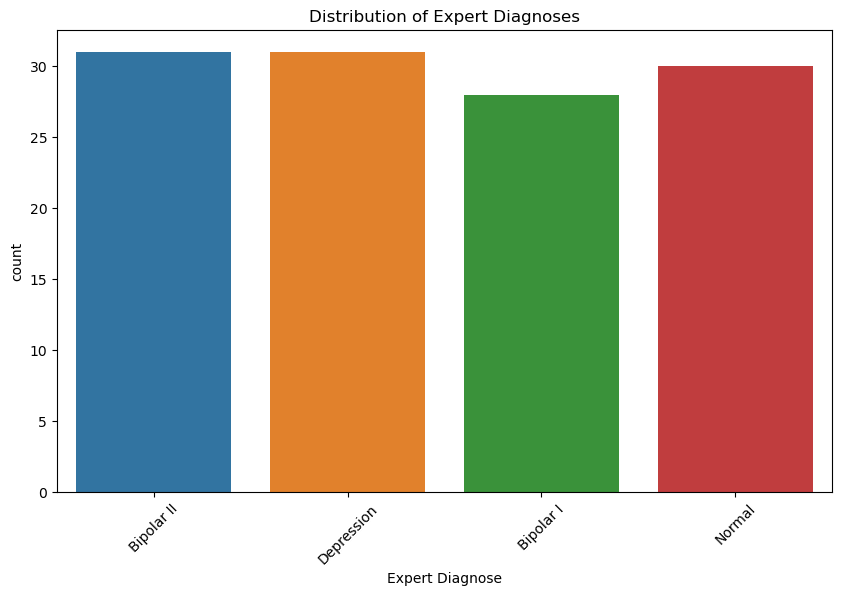

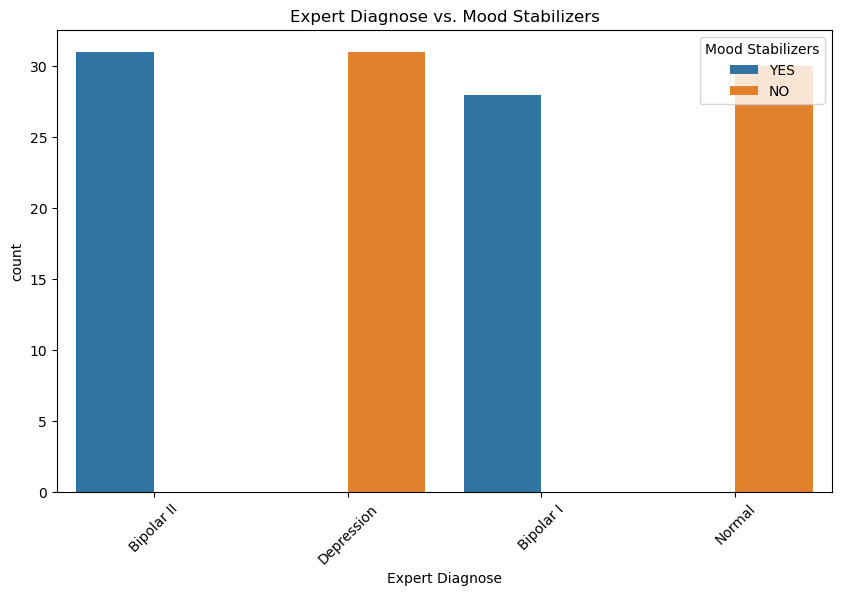

In [82]:
# Visualize the distribution of Expert Diagnose
plt.figure(figsize=(10, 6))
sns.countplot(x='Expert Diagnose', data=p_med)
plt.title('Distribution of Expert Diagnoses')
plt.xticks(rotation=45)
plt.show()

# Visualize the relationship between Expert Diagnose and Mood_Stabilizers
plt.figure(figsize=(10, 6))
sns.countplot(x='Expert Diagnose', hue='Mood_Stabilizers', data=p_med)
plt.title('Expert Diagnose vs. Mood Stabilizers')
plt.xticks(rotation=45)
plt.legend(title='Mood Stabilizers')
plt.show()

# Hypothesis Testing Steps:


Null Hypothesis (H0): There is no association between gender and diagnoses 
Alternative Hypothesis (H1): There is an association between gender and diagnoses    
We'll use a significance level (α) of 0.05.



# Testing for Diagnoses:


We'll perform a chi-square test to determine if there is a significant association between gender and diagnoses.

In [83]:


# Create a contingency table for diagnoses and gender
contingency_table_diagnoses = pd.crosstab(p_med['Expert Diagnose'], p_med['Male Percentage'])

# Perform chi-square test for diagnoses
chi2_diagnoses, p_diagnoses, dof_diagnoses, expected_diagnoses = chi2_contingency(contingency_table_diagnoses)
print("Contingency Table for Diagnoses and Gender:")
print(contingency_table_diagnoses)
# Print the p-value
print("p-value for diagnoses and gender:", p_diagnoses)

Contingency Table for Diagnoses and Gender:
Male Percentage  33.333333  39.450000  43.633333
Expert Diagnose                                 
Bipolar I                0         28          0
Bipolar II               0          0         31
Depression              31          0          0
p-value for diagnoses and gender: 7.456551487831261e-38


# Based on the p-value (7.46e-38), which is significantly less than the significance level of 0.05, we reject the null hypothesis and conclude that there is a significant association between diagnoses and gender. This suggests that the distribution of diagnoses differs significantly across genders.

In [84]:
print(last_14_columns['Male Percentage'].unique())


[43.63333333 33.33333333 39.45               nan]


In [85]:
# Filter data for the diagnoses of interest
diagnoses_of_interest = ['Bipolar II', 'Bipolar I','Depression']
filtered_data = last_14_columns.loc[last_14_columns['Expert Diagnose'].isin(diagnoses_of_interest), ['Expert Diagnose', 'Male Percentage']]

In [86]:
print("Filtered Data for Chi-Square Test:")
print(filtered_data.head())

Filtered Data for Chi-Square Test:
  Expert Diagnose  Male Percentage
0      Bipolar II        43.633333
1      Depression        33.333333
2       Bipolar I        39.450000
3      Bipolar II        43.633333
5      Depression        33.333333


In [87]:

# Create a contingency table for diagnoses of interest and gender
contingency_table_diagnoses_of_interest = pd.crosstab(filtered_data['Expert Diagnose'], filtered_data['Male Percentage'])

# Perform chi-square test for diagnoses of interest and gender
chi2_diagnoses_of_interest, p_diagnoses_of_interest, dof_diagnoses_of_interest, expected_diagnoses_of_interest = chi2_contingency(contingency_table_diagnoses_of_interest)

# Print the p-value
print("p-value for diagnoses of interest and gender:", p_diagnoses_of_interest)

# Display the contingency table for diagnoses of interest and gender
print("Contingency Table for Diagnoses of Interest and Gender:")
print(contingency_table_diagnoses_of_interest)

p-value for diagnoses of interest and gender: 7.456551487831261e-38
Contingency Table for Diagnoses of Interest and Gender:
Male Percentage  33.333333  39.450000  43.633333
Expert Diagnose                                 
Bipolar I                0         28          0
Bipolar II               0          0         31
Depression              31          0          0


From the contingency table:

For Bipolar Type 1, there are 28 cases where the male percentage is 39.45%, but there are no cases where the male percentage is 33.33% or 43.63%.
For Bipolar Type 2, there are 31 cases where the male percentage is 43.63%, but there are no cases where the male percentage is 33.33% or 39.45%.
For Depression, there are 31 cases where the male percentage is 33.33%, but there are no cases where the male percentage is 39.45% or 43.63%.
Based on this analysis:

Males are more likely to be diagnosed with Bipolar Type 2 compared to Bipolar Type 1 or Depression.
Females are more likely to be diagnosed with Depression compared to Bipolar Type 1 or Bipolar Type 2.

# Which gender has a higher prevalence of Bipolar Type 1, Bipolar Type 2, and Depression?
Insight:
Males tend to have a higher prevalence of Bipolar Type 2, while females have a higher prevalence of Depression compared to other diagnoses.


# *Is there a relationship between the male percentage and the likelihood of being diagnosed with each condition?

The distribution of male percentage varies across diagnoses, suggesting a potential relationship between gender distribution and diagnosis.

C:\Users\Mahmoud Shoieb\AppData\Local\Temp\ipykernel_11684\1923272101.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=filtered_data, x='Expert Diagnose', y='Male Percentage', palette='Set2')
C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mahmoud Shoieb\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings

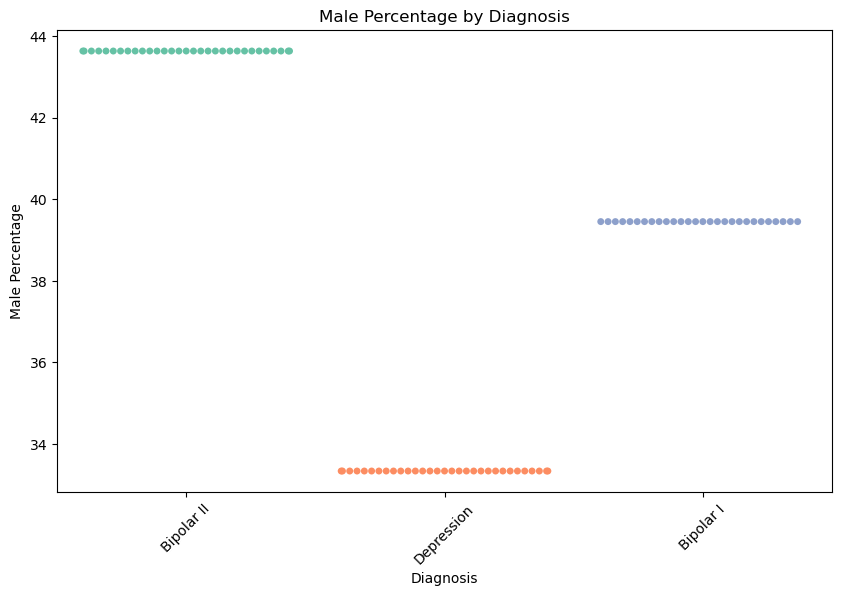

In [88]:
# Create a swarm plot of male percentage by diagnosis
plt.figure(figsize=(10, 6))
sns.swarmplot(data=filtered_data, x='Expert Diagnose', y='Male Percentage', palette='Set2')
plt.title('Male Percentage by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Male Percentage')
plt.xticks(rotation=45)
plt.show()

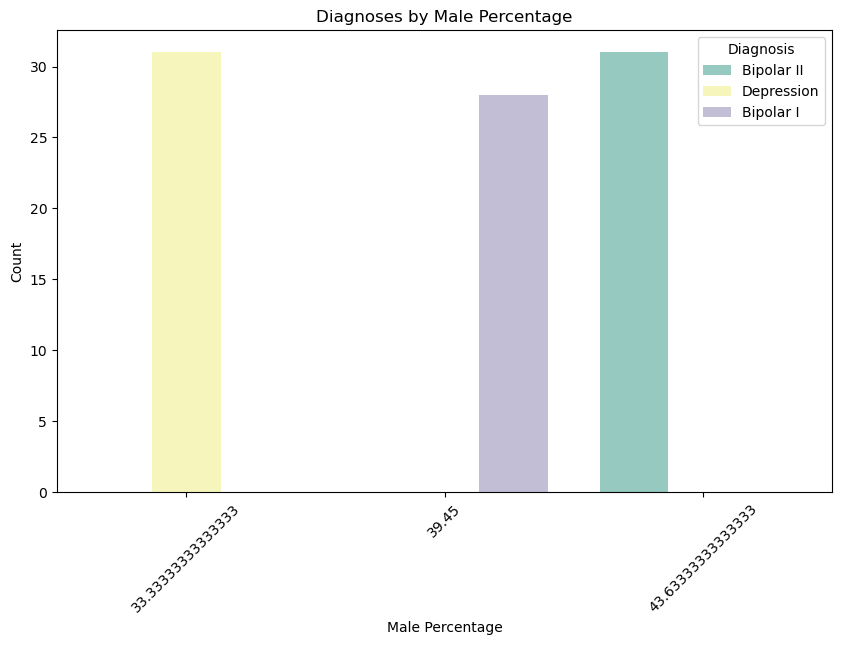

In [89]:
#  clustered bar plot of diagnoses by male percentage
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Male Percentage', hue='Expert Diagnose', palette='Set3')
plt.title('Diagnoses by Male Percentage')
plt.xlabel('Male Percentage')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.xticks(rotation=45)
plt.show()

# Does specific combination of medications have a specific impact on daily life?

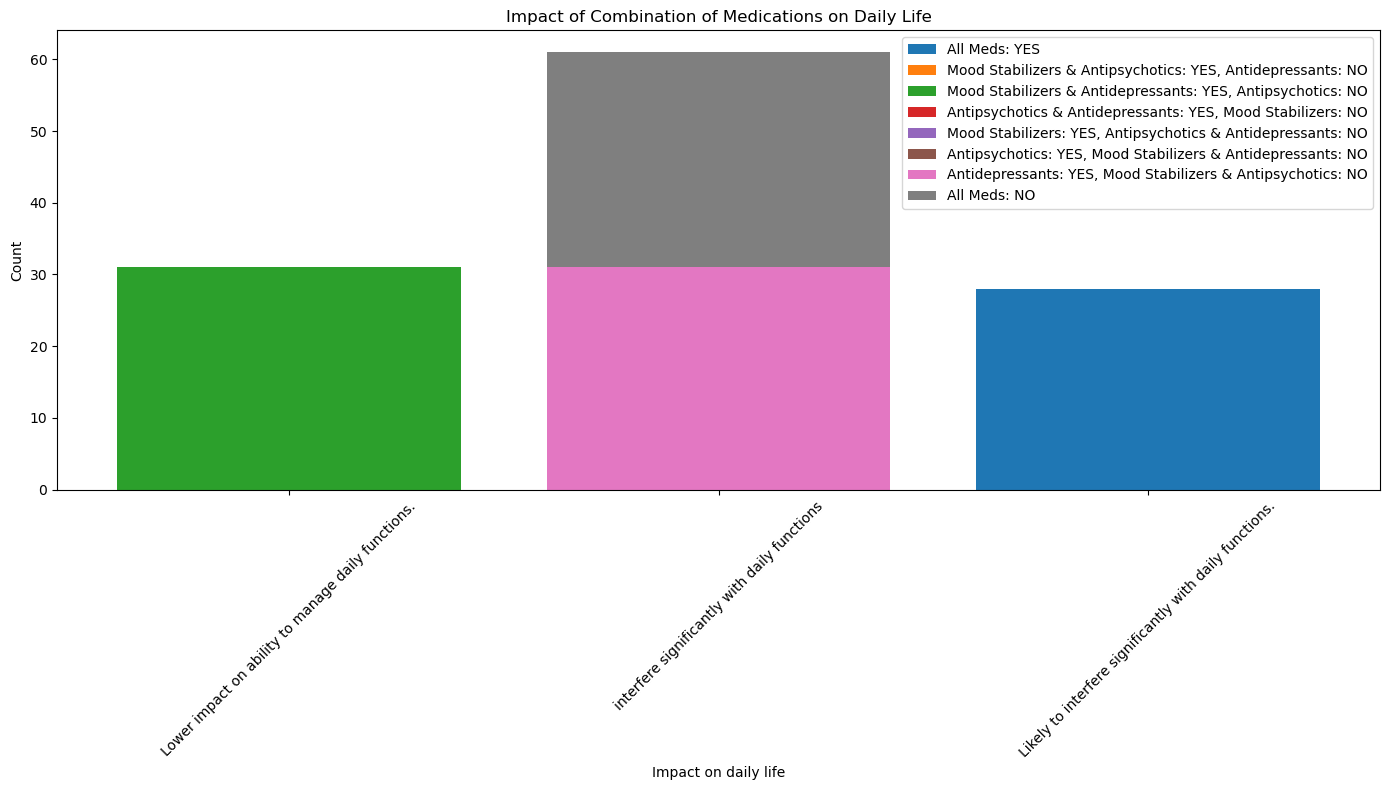

In [90]:
# Define unique values in the "Impact on daily life" column
unique_values = p_med['Impact on daily life'].unique()

# Filter rows with all three medication columns marked as "YES"
filtered_df1 = p_med[(p_med['Mood_Stabilizers'] == 'YES') & 
                     (p_med['Antipsychotics'] == 'YES') & 
                     (p_med['Antidepressants'] == 'YES')]
filtered_df2 = p_med[(p_med['Mood_Stabilizers'] == 'YES') & 
                     (p_med['Antipsychotics'] == 'YES') & 
                     (p_med['Antidepressants'] == 'NO')]
filtered_df3 = p_med[(p_med['Mood_Stabilizers'] == 'YES') & 
                     (p_med['Antipsychotics'] == 'NO') & 
                     (p_med['Antidepressants'] == 'YES')]
filtered_df4 = p_med[(p_med['Mood_Stabilizers'] == 'NO') & 
                     (p_med['Antipsychotics'] == 'YES') & 
                     (p_med['Antidepressants'] == 'YES')]
filtered_df5 = p_med[(p_med['Mood_Stabilizers'] == 'YES') & 
                     (p_med['Antipsychotics'] == 'NO') & 
                     (p_med['Antidepressants'] == 'NO')]
filtered_df6 = p_med[(p_med['Mood_Stabilizers'] == 'NO') & 
                     (p_med['Antipsychotics'] == 'YES') & 
                     (p_med['Antidepressants'] == 'NO')]
filtered_df7 = p_med[(p_med['Mood_Stabilizers'] == 'NO') & 
                     (p_med['Antipsychotics'] == 'NO') & 
                     (p_med['Antidepressants'] == 'YES')]
filtered_df8 = p_med[(p_med['Mood_Stabilizers'] == 'NO') & 
                     (p_med['Antipsychotics'] == 'NO') & 
                     (p_med['Antidepressants'] == 'NO')]

# Initialize a dictionary to store counts of unique values for each filtered dataframe
counts_dict = {}

# Count occurrences of each unique value in the "Impact on daily life" column for each filtered dataframe
for df, label in zip([filtered_df1, filtered_df2, filtered_df3, filtered_df4, filtered_df5, filtered_df6, filtered_df7, filtered_df8], 
                     ['All Meds: YES', 'Mood Stabilizers & Antipsychotics: YES, Antidepressants: NO', 
                      'Mood Stabilizers & Antidepressants: YES, Antipsychotics: NO', 
                      'Antipsychotics & Antidepressants: YES, Mood Stabilizers: NO', 
                      'Mood Stabilizers: YES, Antipsychotics & Antidepressants: NO', 
                      'Antipsychotics: YES, Mood Stabilizers & Antidepressants: NO', 
                      'Antidepressants: YES, Mood Stabilizers & Antipsychotics: NO', 
                      'All Meds: NO']):
    counts_dict[label] = df['Impact on daily life'].value_counts().reindex(unique_values, fill_value=0)

# Create visualization
plt.figure(figsize=(14, 8))

# Plot stacked bar chart for each combination of medication conditions
bottom = None
for label in counts_dict:
    counts = counts_dict[label]
    plt.bar(unique_values, counts, label=label, bottom=bottom)
    if bottom is None:
        bottom = counts
    else:
        bottom += counts

# Add labels and title
plt.title('Impact of Combination of Medications on Daily Life')
plt.xlabel('Impact on daily life')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


analysis: Taking all three medications (antidepressants, mood stabilizers, and antipsychotics) appears to have the greatest impact on a person's ability to manage daily functions.
Taking only mood stabilizers and antipsychotics, or only antidepressants and mood stabilizers also appears to have a significant impact on daily function.
Taking just antidepressants, or just mood stabilizers, or just antipsychotics appears to have a lower impact on a person's ability to manage daily functions.
Not taking any medications appears to have the least impact on a person's ability to manage daily functions.

# who have more Suicidal thoughts (males or females) in each diagnose ?

<Figure size 1000x600 with 0 Axes>

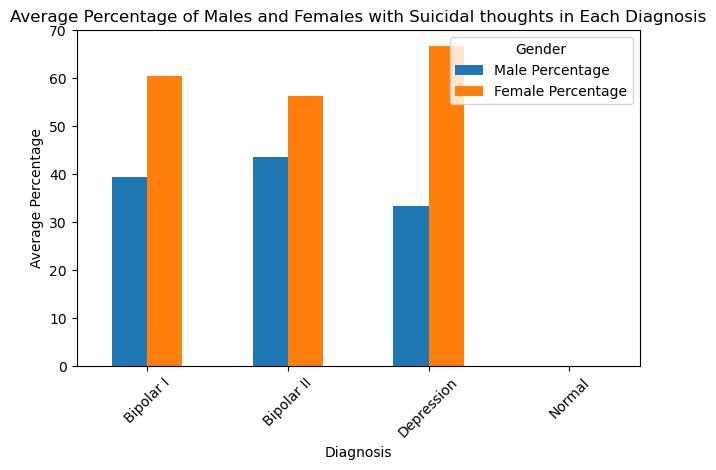

In [91]:
# Filter rows where Mood Swing is 'YES'
mood_swing_yes = p_med[p_med['Suicidal thoughts'] == 'YES']

# Group by 'Expert Diagnose', calculate average male and female percentage
grouped = mood_swing_yes.groupby('Expert Diagnose')[['Male Percentage', 'Female Percentage']].mean()

# Plotting
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=False)
plt.title('Average Percentage of Males and Females with Suicidal thoughts in Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Percentage')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

analysis:Across all diagnoses, females have a higher average percentage of suicidal thoughts than males.

# Which higher gender percentage with Mood_Stabilizers?

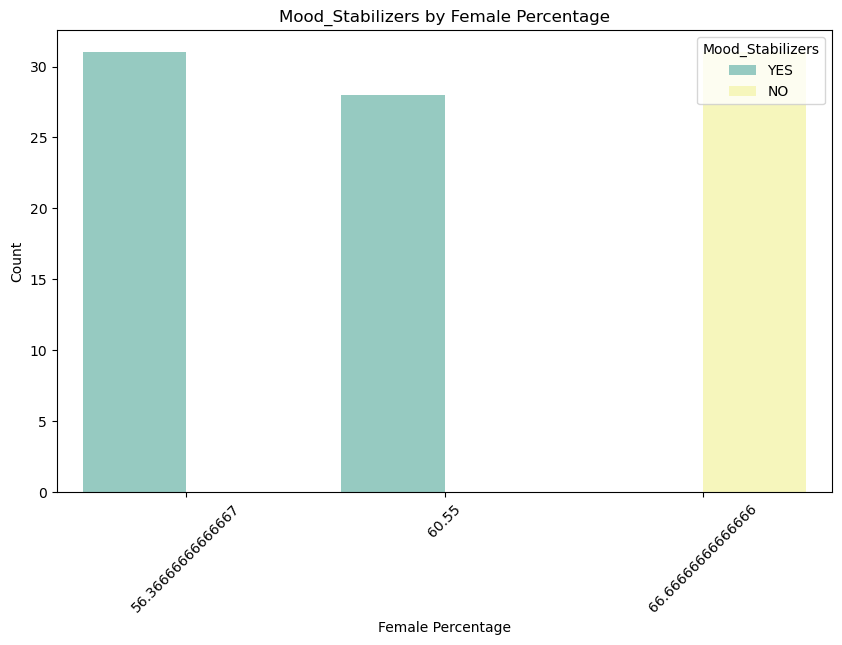

In [92]:
# Create a clustered bar plot of Mania by Female percentage
plt.figure(figsize=(10, 6)) #This line creates a new figure with a specified size of 10 inches in width and 6 inches in height.
sns.countplot(data=last_14_columns, x='Female Percentage', hue='Mood_Stabilizers', palette='Set3') #The palette='Set3' argument specifies the color palette to be used for the plot.
plt.title('Mood_Stabilizers by Female Percentage') #Sets the title of the plot to 'Mood_Stabilizers by Female Percentage'.
plt.xlabel('Female Percentage') #Sets the label for the x-axis as 'Female Percentage'.
plt.ylabel('Count') #Sets the label for the y-axis as 'Count'.
plt.legend(title='Mood_Stabilizers') #Adds a legend to the plot with the title 'Mood_Stabilizers'.
#This legend will show the different categories of 'Mood_Stabilizers' represented in the plot.
plt.xticks(rotation=45) #Rotates the x-axis labels by 45 degrees for better readability.
plt.show() #Displays the plot.

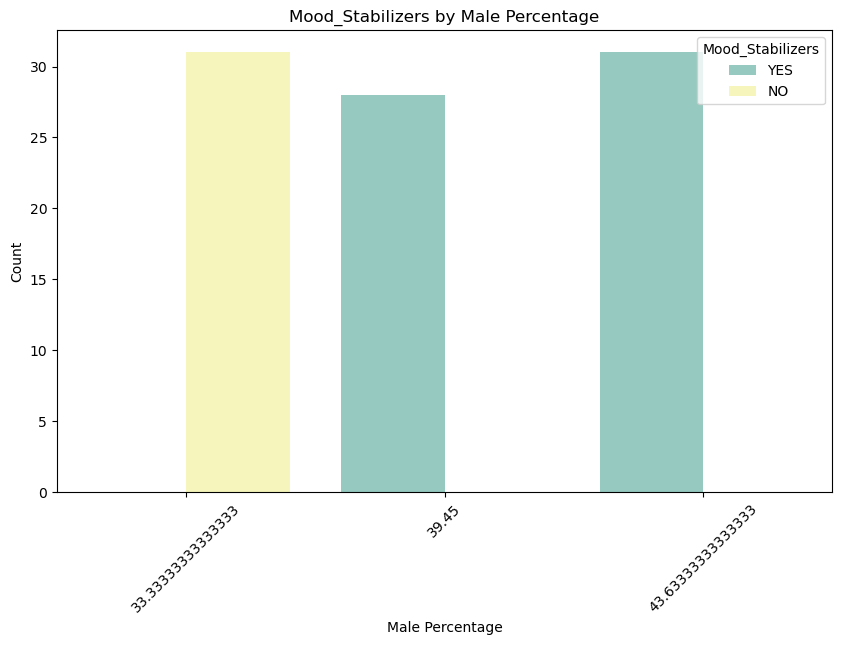

In [93]:
# Create a clustered bar plot of Mania by Male percentage
plt.figure(figsize=(10, 6))#This line creates a new figure with a size of 10 inches in width and 6 inches in height
sns.countplot(data=last_14_columns, x='Male Percentage', hue='Mood_Stabilizers', palette='Set3')#This line generates a countplot using seaborn's countplot function. 
plt.title('Mood_Stabilizers by Male Percentage')#Sets the title of the plot to 'Mood_Stabilizers by Male Percentage'.
plt.xlabel('Male Percentage')#Sets the label for the x-axis as 'Male Percentage'.
plt.ylabel('Count')#Sets the label for the y-axis as 'Count'.
plt.legend(title='Mood_Stabilizers')#Adds a legend to the plot with the title 'Mood_Stabilizers'. 
plt.xticks(rotation=45) #Rotates the x-axis labels by 45 degrees for better readability.
plt.show() #Displays the plot.